In [1]:
results_dict = {}

In [2]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import concurrent.futures
from collections import defaultdict

api = wandb.Api(timeout=45)


In [3]:
entity, project = "unlearning-dynamics", "unlearning-dp-f2"
f2_runs = api.runs(f"{entity}/{project}")

In [10]:
entity, project = "unlearning-dynamics", "unlearning-dp-f2"
f2_runs = api.runs(f"{entity}/{project}")
baseline_runs = [run for run in f2_runs if  run.config["unlearning"]["algorithm"] == "retrain"and run.config["model"]["name"]=="tiny_net" and run.state=="finished" and run.config["dataset"]["name"]=="mnist"]
cc2_runs = [run for run in f2_runs if run.config["unlearning"]["algorithm"] == "contractive_coefficients" and run.config["unlearning"]["contractive_coefficients"]["noise_addition_after_projection"] == False and run.config["model"]["name"]=="tiny_net" and run.state=="finished" and run.config["dataset"]["name"]=="mnist"]
cc1_runs = [run for run in f2_runs if run.config["unlearning"]["algorithm"] == "contractive_coefficients" and run.config["unlearning"]["contractive_coefficients"]["noise_addition_after_projection"] == True and run.config["model"]["name"]=="tiny_net" and run.state=="finished" and run.config["dataset"]["name"]=="mnist"]
pabi_runs = [run for run in f2_runs if run.config["unlearning"]["algorithm"] == "iteration"and run.config["model"]["name"]=="tiny_net" and run.state=="finished" and run.config["dataset"]["name"]=="mnist"]
dp_baseline_runs = [run for run in f2_runs if  run.config["unlearning"]["algorithm"] == "dp-baseline" and run.config["model"]["name"]=="tiny_net" and run.state=="finished" and run.config["dataset"]["name"]=="mnist"]
print(f'{len(baseline_runs)} baseline runs')
print(f'{len(cc2_runs)} cc2 runs')
print(f'{len(cc1_runs)} cc1 runs')
print(f'{len(pabi_runs)} pabi runs')



baseline_runs_cifar = [run for run in f2_runs if  run.config["unlearning"]["algorithm"] == "retrain"and run.config["model"]["name"]=="tiny_net_cifar" and run.state=="finished" and run.config["dataset"]["name"]=="cifar10"]
cc2_runs_cifar = [run for run in f2_runs if run.config["unlearning"]["algorithm"] == "contractive_coefficients" and run.config["unlearning"]["contractive_coefficients"]["noise_addition_after_projection"] == False and run.config["model"]["name"]=="tiny_net_cifar" and run.state=="finished" and run.config["dataset"]["name"]=="cifar10"]
cc1_runs_cifar = [run for run in f2_runs if run.config["unlearning"]["algorithm"] == "contractive_coefficients" and run.config["unlearning"]["contractive_coefficients"]["noise_addition_after_projection"] == True and run.config["model"]["name"]=="tiny_net_cifar" and run.state=="finished" and run.config["dataset"]["name"]=="cifar10"]
pabi_runs_cifar = [run for run in f2_runs if run.config["unlearning"]["algorithm"] == "iteration"and run.config["model"]["name"]=="tiny_net_cifar" and run.state=="finished" and run.config["dataset"]["name"]=="cifar10"]
dp_baseline_runs_cifar = [run for run in f2_runs if  run.config["unlearning"]["algorithm"] == "dp-baseline" and run.config["model"]["name"]=="tiny_net_cifar" and run.state=="finished" and run.config["dataset"]["name"]=="cifar10"]
print(f'{len(baseline_runs_cifar)} baseline runs')
print(f'{len(cc2_runs_cifar)} cc2 runs')
print(f'{len(cc1_runs_cifar)} cc1 runs')
print(f'{len(pabi_runs_cifar)} pabi runs')



16 baseline runs
9171 cc2 runs
5062 cc1 runs
4781 pabi runs
16 baseline runs
0 cc2 runs
649 cc1 runs
1540 pabi runs


In [4]:
dp_baseline_runs = [run for run in f2_runs if  run.config["unlearning"]["algorithm"] == "dp-baseline" and run.config["model"]["name"]=="tiny_net" and run.state=="finished" and run.config["dataset"]["name"]=="mnist"]
print(f'{len(dp_baseline_runs)=}')

len(dp_baseline_runs)=100


In [6]:
pabi_df = pd.read_csv("pabi_tiny_flat.csv")
cc1_df = pd.read_csv("cc1_tiny_flat.csv")
cc2_df = pd.read_csv("cc2_tiny_flat.csv")
baseline_df = pd.read_csv("baseline_tiny_flat.csv")
dp_baseline_df = pd.read_csv("dp_baseline_tiny_flat.csv")

pabi_df_cifar = pd.read_csv("pabi_tiny_cifar_flat.csv")
cc1_df_cifar = pd.read_csv("cc1_tiny_cifar_flat.csv")
cc2_df_cifar = pd.read_csv("cc2_tiny_cifar_flat.csv")
baseline_df_cifar = pd.read_csv("baseline_tiny_cifar_flat.csv")
dp_baseline_df_cifar = pd.read_csv("dp_baseline_tiny_cifar_flat.csv")

In [7]:
iteration_cifar100_df= pd.read_csv("rebuttal_iteration_cifar100.csv")
iteration_cifar10_fc_df= pd.read_csv("rebuttal_iteration_cifar10_fc.csv")
retrain_cifar100_df= pd.read_csv("rebuttal_retrain_cifar100.csv")
retrain_cifar10_fc_df= pd.read_csv("rebuttal_retrain_cifar10_fc.csv")


dpsgd_cifar10_feature_df = pd.read_csv("rebuttal_dpsgd_cifar10_feature.csv")
dpsgd_cifar100_df = pd.read_csv("rebuttal_dpsgd_cifar100.csv")

In [ ]:
api = wandb.Api(timeout=45)
entity, project = "unlearning-dynamics", "unlearning-dp-rebuttal"
# new_runs = api.runs(f"{entity}/{project}")
# cifar100_runs = api.runs(f"{entity}/unlearning-dp-cifar-100")
runs = api.runs(f"{entity}/unlearning-dp-dpsgd")

In [ ]:
cifar10_dp_sgd_runs = [run for run in runs if run.config["dataset"]["name"] == "cifar10" and run.state == "finished" and run.config["unlearning"]["algorithm"]=="dp-sgd" and run.config["training"].get("group_dp") and run.config["dataset"]["forget_split"]==0.005]
cifar10_feature_dp_sgd_runs = [run for run in runs if run.config["dataset"]["name"] == "cifar10_feature" and run.state == "finished" and run.config["unlearning"]["algorithm"]=="dp-sgd" and run.config["training"].get("group_dp") and run.config["dataset"]["forget_split"]==0.005]
cifar100_dp_sgd_runs = [run for run in runs if run.config["dataset"]["name"] == "cifar100_feature" and run.state == "finished" and run.config["unlearning"]["algorithm"]=="dp-sgd" and run.config["training"].get("group_dp") and run.config["dataset"]["forget_split"]==0.005]
mnist_dp_sgd_runs = [run for run in runs if run.config["dataset"]["name"] == "mnist" and run.state == "finished" and run.config["unlearning"]["algorithm"]=="dp-sgd" and run.config["training"].get("group_dp") and run.config["dataset"]["forget_split"]==0.005]

In [ ]:
print(len(cifar10_dp_sgd_runs))
print(len(cifar10_feature_dp_sgd_runs))
print(len(cifar100_dp_sgd_runs))
print(len(mnist_dp_sgd_runs))

In [ ]:
cifar10_feature_iteration_runs = [run for run in runs if run.config["dataset"]["name"] == "cifar10_feature" and run.state == "finished" and run.config["unlearning"]["algorithm"]=="iteration"]
cifar100_iteration_runs = [run for run in runs if run.config["dataset"]["name"] == "cifar100_feature" and run.state == "finished" and run.config["unlearning"]["algorithm"]=="iteration"]
cifar10_feature_retrain_runs = [run for run in runs if run.config["dataset"]["name"] == "cifar10_feature" and run.state == "finished" and run.config["unlearning"]["algorithm"]=="retrain"]
cifar100_retrain_runs = [run for run in runs if run.config["dataset"]["name"] == "cifar100_feature" and run.state == "finished" and run.config["unlearning"]["algorithm"]=="retrain"]

print(f'{len(cifar10_feature_iteration_runs)=}')
print(f'{len(cifar100_iteration_runs)=}')
print(f'{len(cifar10_feature_retrain_runs)=}')
print(f'{len(cifar100_retrain_runs)=}')

In [ ]:
entity, project = "unlearning-dynamics", "unlearning-dp-camera"
camera_runs = api.runs(f"{entity}/{project}")

In [ ]:
pabi_camera_runs = [run for run in camera_runs if run.config["unlearning"]["algorithm"] == "iteration"and run.config["model"]["name"]=="tiny_net" and run.state=="finished" and run.config["dataset"]["name"]=="mnist"]
pabi_camera_runs_cifar = [run for run in camera_runs if run.config["unlearning"]["algorithm"] == "iteration"and run.config["model"]["name"]=="tiny_net_cifar" and run.state=="finished" and run.config["dataset"]["name"]=="cifar10"]
print(f"{len(pabi_camera_runs)=}, {len(pabi_camera_runs_cifar)=}")

In [ ]:
pabi_camera_df = pd.read_csv("pabi_camera_mnist.csv")
pabi_camera_df_cifar = pd.read_csv("pabi_camera_cifar.csv")


In [38]:
# might need to rerun this cell because wandb is terrible, results_dict is a cache
def process_pabi_run(run):
    if run.id in results_dict:
        return results_dict[run.id]
    if run.id in pabi_df['run_name'].values or run.id in pabi_df_cifar['run_name'].values or run.id in pabi_camera_df['run_name'].values or run.id in pabi_camera_df_cifar['run_name'].values:
        return None
    df = pd.DataFrame(run.scan_history(keys=["epsilon"]))
    if 'epsilon' not in df.columns:
        return None

    result = {
        'eps': df["epsilon"].min(),
        'delta': run.config["unlearning"]["delta"],
        # 'config_eps_renyi': run.config["unlearning"]["iteration"]["epsilon_renyi_target"],
        'config_regularization': run.config["unlearning"]["weight_decay"],
        'config_grad_clip': run.config["unlearning"]["iteration"]["grad_clip"],
        'config_eta': run.config["unlearning"]["max_lr"],
        'config_kappa': run.config["unlearning"]["init_model_clip"],
        'config_post_unlearn_clip': run.config["post_unlearning"]["post_unlearn_clip"],
        'run_name': run.id,
        'model_name': run.config["model"]["name"],
        'test_acc': run.summary["Test_accuracy"]
    }
    num_epochs = run.config["unlearning"]["epochs"]
    df_val_acc = pd.DataFrame(run.scan_history(keys=["Val (Unlearn)_accuracy", "unlearn_epoch"]))
    val_acc = {e: df_val_acc["Val (Unlearn)_accuracy"][df_val_acc["unlearn_epoch"] == e].max() for e in range(1, num_epochs+1)}
    result['val_acc_history'] = val_acc
    results_dict[run.id] = result
    return result

def process_dp_run(run):
    print(run.id)
    if run.id in results_dict:
        return results_dict[run.id]
    df = pd.DataFrame(run.scan_history(keys=["epsilon","delta"]))
    if 'epsilon' not in df.columns:
        return None
    
    result = {
        'eps': df["epsilon"].min(),
        'delta': df["delta"].min(),
        'run_name': run.id,
        'model_name': run.config["model"]["name"],
        'l2_norm_clip': run.config["training"]["dp_sgd"]["l2_norm_clip"],
        'dp_sigma': run.summary["dp_sigma"],
        'test_acc': run.summary.get("Test_accuracy"),
    }
    num_epochs = run.config["unlearning"]["epochs"]
    df_val_acc = pd.DataFrame(run.scan_history(keys=["Val (Unlearn)_accuracy", "unlearn_epoch"]))
    val_acc = {e: df_val_acc["Val (Unlearn)_accuracy"][df_val_acc["unlearn_epoch"] == e].max() for e in range(1, num_epochs+1)}
    for e in range(2, num_epochs+1):
        val_acc[e] = max(val_acc[e], val_acc[e-1])
    result['val_acc_history'] = val_acc

    num_epochs_t = run.config["training"]["epochs"]
    df_train_acc = pd.DataFrame(run.scan_history(keys=["Val (Train)_accuracy", "epoch"]))
    train_acc = {e: df_train_acc["Val (Train)_accuracy"][df_train_acc["epoch"] == e].max() for e in range(1, num_epochs_t+1)}
    for e in range(2, num_epochs_t+1):
        train_acc[e] = max(train_acc[e], train_acc[e-1])
    result['train_acc_history'] = train_acc
    results_dict[run.id] = result
    return result

In [13]:

with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results_pabi = list(tqdm.tqdm(executor.map(process_pabi_run, pabi_runs), total=len(pabi_runs)))

results_pabi = [r for r in results_pabi if r is not None]

pabi_data = {
    'eps': [r['eps'] for r in results_pabi],
    # 'test_acc': [r['test_acc'] for r in results_pabi],
    'val_acc_history': [r['val_acc_history'] for r in results_pabi],
    'delta': [r['delta'] for r in results_pabi],
    # 'config_eps_renyi': [r['config_eps_renyi'] for r in results_pabi],
    'config_regularization': [r['config_regularization'] for r in results_pabi],
    'config_grad_clip': [r['config_grad_clip'] for r in results_pabi],
    'config_eta': [r['config_eta'] for r in results_pabi],
    'config_kappa': [r['config_kappa'] for r in results_pabi],
    'config_post_unlearn_clip': [r['config_post_unlearn_clip'] for r in results_pabi],
    'run_name': [r['run_name'] for r in results_pabi],
    'model_name': [r['model_name'] for r in results_pabi],
    'test_acc': [r['test_acc'] for r in results_pabi]
}
pabi_df_diff= pd.DataFrame(pabi_data)
val_acc_history_df = pd.json_normalize(pabi_df_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
pabi_df_diff = pd.concat([pabi_df_diff, val_acc_history_df], axis=1)
pabi_df_diff.drop(columns=['val_acc_history'], inplace=True)
pabi_df = pd.concat([pabi_df, pabi_df_diff], axis=0)

100%|██████████| 4781/4781 [00:00<00:00, 364904.60it/s]


In [14]:
pabi_df
pabi_df.to_csv("pabi_tiny_flat.csv")

In [15]:

with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results_pabi_cifar = list(tqdm.tqdm(executor.map(process_pabi_run, pabi_runs_cifar), total=len(pabi_runs_cifar)))

results_pabi_cifar = [r for r in results_pabi_cifar if r is not None]

pabi_data_cfiar = {
    'eps': [r['eps'] for r in results_pabi_cifar],
    # 'test_acc': [r['test_acc'] for r in results_pabi_cifar],
    'val_acc_history': [r['val_acc_history'] for r in results_pabi_cifar],
    'delta': [r['delta'] for r in results_pabi_cifar],
    # 'config_eps_renyi': [r['config_eps_renyi'] for r in results_pabi_cifar],
    'config_regularization': [r['config_regularization'] for r in results_pabi_cifar],
    'config_grad_clip': [r['config_grad_clip'] for r in results_pabi_cifar],
    'config_eta': [r['config_eta'] for r in results_pabi_cifar],
    'config_kappa': [r['config_kappa'] for r in results_pabi_cifar],
    'config_post_unlearn_clip': [r['config_post_unlearn_clip'] for r in results_pabi_cifar],
    'run_name': [r['run_name'] for r in results_pabi_cifar],
    'model_name': [r['model_name'] for r in results_pabi_cifar],
    'test_acc': [r['test_acc'] for r in results_pabi_cifar]
}
pabi_cifar_df_diff= pd.DataFrame(pabi_data_cfiar)
val_acc_history_df = pd.json_normalize(pabi_cifar_df_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
pabi_cifar_df_diff = pd.concat([pabi_cifar_df_diff, val_acc_history_df], axis=1)
pabi_cifar_df_diff.drop(columns=['val_acc_history'], inplace=True)
pabi_df_cifar = pd.concat([pabi_df_cifar, pabi_cifar_df_diff], axis=0)

100%|██████████| 1540/1540 [00:00<00:00, 174215.89it/s]


In [16]:
pabi_df_cifar
pabi_df_cifar.to_csv("pabi_tiny_cifar_flat.csv")

In [7]:

def process_baseline_run(run):
    if run.id in results_dict:
        return results_dict[run.id]
    if run.id in baseline_df['run_name'].values or run.id in baseline_df_cifar['run_name'].values or run.id in dp_baseline_df['run_name'].values or run.id in dp_baseline_df_cifar['run_name'].values:
        return None
    df = pd.DataFrame(run.scan_history())
    
    if 'epsilon' not in df.columns:
        return None

    result = {
        'delta': df['delta'].min(),
        'eps': df['epsilon'].min(),
        'run_name': run.id,
        'post_unlearn_clip': run.config["post_unlearning"]["post_unlearn_clip"],
        'algorithm': run.config["unlearning"]["algorithm"],
        'test_acc': df['Test_accuracy'].max(),
        'model_name': run.config["model"]["name"],
        "unlearn_init_clip": run.config["unlearning"]["init_model_clip"],
    }
    num_epochs = run.config["unlearning"]["epochs"]
    val_acc = {e: df["Val (Unlearn)_accuracy"][df["unlearn_epoch"]==e].max() for e in range(1, num_epochs+1)}
    result['val_acc_history'] = val_acc
    results_dict[run.id] = result
    return result


In [18]:

results = [process_baseline_run(run) for run in baseline_runs]
results = [r for r in results if r is not None]
baseline_data = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results],
    'algorithm': [r['algorithm'] for r in results],
    'test_acc': [r['test_acc'] for r in results],
    'model_name': [r['model_name'] for r in results]
}
baseline_df_diff= pd.DataFrame(baseline_data)


val_acc_history_df = pd.json_normalize(baseline_df_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
baseline_df_diff = pd.concat([baseline_df_diff, val_acc_history_df], axis=1)
baseline_df_diff.drop(columns=['val_acc_history'], inplace=True)
baseline_df = pd.concat([baseline_df, baseline_df_diff], axis=0)


In [19]:
baseline_df
baseline_df.to_csv("baseline_tiny_flat.csv")

In [20]:

results_cifar = [process_baseline_run(run) for run in baseline_runs_cifar]
results_cifar = [r for r in results_cifar if r is not None]
baseline_data_cifar = {
    'val_acc_history': [r['val_acc_history'] for r in results_cifar],
    'delta': [r['delta'] for r in results_cifar],
    'eps': [r['eps'] for r in results_cifar],
    'run_name': [r['run_name'] for r in results_cifar],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results_cifar],
    'algorithm': [r['algorithm'] for r in results_cifar],
    'test_acc': [r['test_acc'] for r in results_cifar],
    'model_name': [r['model_name'] for r in results_cifar]
}
baseline_df_cifar_diff= pd.DataFrame(baseline_data_cifar)

val_acc_history_df = pd.json_normalize(baseline_df_cifar_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
baseline_df_cifar_diff = pd.concat([baseline_df_cifar_diff, val_acc_history_df], axis=1)
baseline_df_cifar_diff.drop(columns=['val_acc_history'], inplace=True)
baseline_df_cifar = pd.concat([baseline_df_cifar, baseline_df_cifar_diff], axis=0)



In [21]:
baseline_df_cifar
baseline_df_cifar.to_csv("baseline_tiny_cifar_flat.csv")

In [10]:


with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results = list(tqdm.tqdm(executor.map(process_baseline_run, dp_baseline_runs), total=len(dp_baseline_runs)))

results = [r for r in results if r is not None]

dp_baseline_data = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results],
    'algorithm': [r['algorithm'] for r in results],
    'test_acc': [r['test_acc'] for r in results],
    'model_name': [r['model_name'] for r in results],
    'init_model_clip': [r['unlearn_init_clip'] for r in results]
}
dp_baseline_df_diff= pd.DataFrame(dp_baseline_data)


val_acc_history_df = pd.json_normalize(dp_baseline_df_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
dp_baseline_df_diff = pd.concat([dp_baseline_df_diff, val_acc_history_df], axis=1)
dp_baseline_df_diff.drop(columns=['val_acc_history'], inplace=True)
dp_baseline_df = pd.concat([dp_baseline_df, dp_baseline_df_diff], axis=0)
dp_baseline_df_diff.to_csv("dp_baseline_tiny_flat.csv")



with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results_cifar = list(tqdm.tqdm(executor.map(process_baseline_run, dp_baseline_runs_cifar), total=len(dp_baseline_runs_cifar)))

results_cifar = [r for r in results_cifar if r is not None]

dp_baseline_data_cifar = {
    'val_acc_history': [r['val_acc_history'] for r in results_cifar],
    'delta': [r['delta'] for r in results_cifar],
    'eps': [r['eps'] for r in results_cifar],
    'run_name': [r['run_name'] for r in results_cifar],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results_cifar],
    'algorithm': [r['algorithm'] for r in results_cifar],
    'test_acc': [r['test_acc'] for r in results_cifar],
    'model_name': [r['model_name'] for r in results_cifar],
    'init_model_clip': [r['unlearn_init_clip'] for r in results_cifar]
}
dp_baseline_df_cifar_diff= pd.DataFrame(dp_baseline_data_cifar)

val_acc_history_df = pd.json_normalize(dp_baseline_df_cifar_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
dp_baseline_df_cifar_diff = pd.concat([dp_baseline_df_cifar_diff, val_acc_history_df], axis=1)
dp_baseline_df_cifar_diff.drop(columns=['val_acc_history'], inplace=True)
dp_baseline_df_cifar = pd.concat([dp_baseline_df_cifar, dp_baseline_df_cifar_diff], axis=0)
dp_baseline_df_cifar.to_csv("dp_baseline_tiny_cifar_flat.csv")

100%|██████████| 100/100 [00:16<00:00,  5.98it/s]
/tmp/user/24125/ipykernel_4138942/478583353.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dp_baseline_df = pd.concat([dp_baseline_df, dp_baseline_df_diff], axis=0)


In [23]:
def process_run(run):
    if run.id in results_dict:
        return results_dict[run.id]
    if run.id in cc1_df['run_name'].values:
        return None
    if run.id in cc2_df['run_name'].values:
        return None
    if run.id in cc1_df_cifar['run_name'].values:
        return None
    if run.id in cc2_df_cifar['run_name'].values:
        return None
    df_delta_eps = pd.DataFrame(run.scan_history(keys=["delta", "epsilon"]))
    if 'epsilon' not in df_delta_eps.columns:
        return None
    df_val_acc = pd.DataFrame(run.scan_history(keys=["Val (Unlearn)_accuracy", "unlearn_epoch"]))
    result = {
        'delta': df_delta_eps['delta'].min(),
        'eps': df_delta_eps['epsilon'].min(),
        'init_clip': run.config["unlearning"]["init_model_clip"],
        'init_sigma': run.config["unlearning"]["init_sigma"],
        'model_name': run.config["model"]["name"],
        'sigma': run.config["unlearning"]["contractive_coefficients"]["sigma"],
        'model_clip': run.config["unlearning"]["contractive_coefficients"]["model_clip"],
        'grad_clip': run.config["unlearning"]["contractive_coefficients"]["grad_clip"],
        'lr': run.config["unlearning"]["max_lr"],
        'regularization': run.config["unlearning"]["weight_decay"],
        'run_name': run.id,
        'post_unlearn_clip': run.config["post_unlearning"]["post_unlearn_clip"],
        'test_acc': run.summary.get("Test_accuracy")
    }

    num_epochs = run.config["unlearning"]["epochs"]
    val_acc = {e: df_val_acc["Val (Unlearn)_accuracy"][df_val_acc["unlearn_epoch"]==e].max() for e in range(1, num_epochs+1)}
    result['val_acc_history'] = val_acc
    results_dict[run.id] = result
    return result

In [24]:
with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results = list(tqdm.tqdm(executor.map(process_run, cc2_runs), total=len(cc2_runs)))
results = [r for r in results if r is not None]
cc2_data = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'init_clip': [r['init_clip'] for r in results],
    'init_sigma': [r['init_sigma'] for r in results],
    'model_name': [r['model_name'] for r in results],
    'sigma': [r['sigma'] for r in results],
    'model_clip': [r['model_clip'] for r in results],
    'grad_clip': [r['grad_clip'] for r in results],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'lr': [r['lr'] for r in results],
    'regularization': [r['regularization'] for r in results],
    'test_acc': [r['test_acc'] for r in results]
}
cc2_df_diff= pd.DataFrame(cc2_data)
val_acc_history_df = pd.json_normalize(cc2_df_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
cc2_df_diff = pd.concat([cc2_df_diff, val_acc_history_df], axis=1)
cc2_df_diff.drop(columns=['val_acc_history'], inplace=True)
cc2_df = pd.concat([cc2_df, cc2_df_diff], axis=0)

100%|██████████| 9171/9171 [00:00<00:00, 20744.21it/s]


In [25]:
cc2_df
cc2_df.to_csv("cc2_tiny_flat.csv")

In [26]:
with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results = list(tqdm.tqdm(executor.map(process_run, cc2_runs_cifar), total=len(cc2_runs_cifar)))
results = [r for r in results if r is not None]
cc2_data_cifar = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'init_clip': [r['init_clip'] for r in results],
    'init_sigma': [r['init_sigma'] for r in results],
    'model_name': [r['model_name'] for r in results],
    'sigma': [r['sigma'] for r in results],
    'model_clip': [r['model_clip'] for r in results],
    'grad_clip': [r['grad_clip'] for r in results],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'lr': [r['lr'] for r in results],
    'regularization': [r['regularization'] for r in results],
    'test_acc': [r['test_acc'] for r in results]
}
cc2_df_diff_cifar= pd.DataFrame(cc2_data_cifar)
val_acc_history_df = pd.json_normalize(cc2_df_diff_cifar['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
cc2_df_diff_cifar = pd.concat([cc2_df_diff_cifar, val_acc_history_df], axis=1)
cc2_df_diff_cifar.drop(columns=['val_acc_history'], inplace=True)
cc2_df_cfiar = pd.concat([cc2_df_cifar, cc2_df_diff_cifar], axis=0)

0it [00:00, ?it/s]


In [27]:
cc2_df_cifar
cc2_df_cifar.to_csv("cc2_tiny_cifar_flat.csv")

In [28]:
with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results = list(tqdm.tqdm(executor.map(process_run, cc1_runs), total=len(cc1_runs)))
results = [r for r in results if r is not None]
cc1_data = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'init_clip': [r['init_clip'] for r in results],
    'init_sigma': [r['init_sigma'] for r in results],
    'model_name': [r['model_name'] for r in results],
    'sigma': [r['sigma'] for r in results],
    'model_clip': [r['model_clip'] for r in results],
    'grad_clip': [r['grad_clip'] for r in results],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'lr': [r['lr'] for r in results],   
    'regularization': [r['regularization'] for r in results],
    'test_acc': [r['test_acc'] for r in results]
}
cc1_df_diff= pd.DataFrame(cc1_data)
val_acc_history_df = pd.json_normalize(cc1_df_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
cc1_df_diff = pd.concat([cc1_df_diff, val_acc_history_df], axis=1)
cc1_df_diff.drop(columns=['val_acc_history'], inplace=True)
cc1_df = pd.concat([cc1_df, cc1_df_diff], axis=0)

100%|██████████| 5062/5062 [00:00<00:00, 284803.98it/s]


In [29]:
cc1_df
cc1_df.to_csv("cc1_tiny_flat.csv")

In [30]:
with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results = list(tqdm.tqdm(executor.map(process_run, cc1_runs_cifar), total=len(cc1_runs_cifar)))
results = [r for r in results if r is not None]
cc1_data = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'init_clip': [r['init_clip'] for r in results],
    'init_sigma': [r['init_sigma'] for r in results],
    'model_name': [r['model_name'] for r in results],
    'sigma': [r['sigma'] for r in results],
    'model_clip': [r['model_clip'] for r in results],
    'grad_clip': [r['grad_clip'] for r in results],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'lr': [r['lr'] for r in results],   
    'regularization': [r['regularization'] for r in results],
    'test_acc': [r['test_acc'] for r in results]
}
cc1_df_diff_cifar= pd.DataFrame(cc1_data)
val_acc_history_df = pd.json_normalize(cc1_df_diff_cifar['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
cc1_df_diff_cifar = pd.concat([cc1_df_diff_cifar, val_acc_history_df], axis=1)
cc1_df_diff_cifar.drop(columns=['val_acc_history'], inplace=True)
cc1_df_cifar = pd.concat([cc1_df_cifar, cc1_df_diff_cifar], axis=0)

100%|██████████| 649/649 [00:00<00:00, 173658.90it/s]


In [31]:
cc1_df_cifar
cc1_df_cifar.to_csv("cc1_tiny_cifar_flat.csv")

In [ ]:
with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results_iteration_cifar100 = list(tqdm.tqdm(executor.map(process_pabi_run, cifar100_iteration_runs), total=len(cifar100_iteration_runs)))

results_iteration_cifar100 = [r for r in results_iteration_cifar100 if r is not None]

iteration_cifar100 = {
    'eps': [r['eps'] for r in results_iteration_cifar100],
    'val_acc_history': [r['val_acc_history'] for r in results_iteration_cifar100],
    'delta': [r['delta'] for r in results_iteration_cifar100],
    'config_regularization': [r['config_regularization'] for r in results_iteration_cifar100],
    'config_grad_clip': [r['config_grad_clip'] for r in results_iteration_cifar100],
    'config_eta': [r['config_eta'] for r in results_iteration_cifar100],
    'config_kappa': [r['config_kappa'] for r in results_iteration_cifar100],
    'config_post_unlearn_clip': [r['config_post_unlearn_clip'] for r in results_iteration_cifar100],
    'run_name': [r['run_name'] for r in results_iteration_cifar100],
    'model_name': [r['model_name'] for r in results_iteration_cifar100],
    'test_acc': [r['test_acc'] for r in results_iteration_cifar100]
}
iteration_cifar100_df= pd.DataFrame(iteration_cifar100)
iteration_cifar100_df_norm = pd.json_normalize(iteration_cifar100_df['val_acc_history'])
iteration_cifar100_df_norm.columns = [f'val_acc_history_{col}' for col in iteration_cifar100_df_norm.columns]
iteration_cifar100_df = pd.concat([iteration_cifar100_df, iteration_cifar100_df_norm], axis=1)
iteration_cifar100_df.drop(columns=['val_acc_history'], inplace=True)
iteration_cifar100_df.to_csv("rebuttal_iteration_cifar100.csv")


with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results_iteration_cifar10_fc = list(tqdm.tqdm(executor.map(process_pabi_run, cifar10_feature_iteration_runs), total=len(cifar10_feature_iteration_runs)))

results_iteration_cifar10_fc = [r for r in results_iteration_cifar10_fc if r is not None]

iteration_cifar10_fc = {
    'eps': [r['eps'] for r in results_iteration_cifar10_fc],
    'val_acc_history': [r['val_acc_history'] for r in results_iteration_cifar10_fc],
    'delta': [r['delta'] for r in results_iteration_cifar10_fc],
    'config_regularization': [r['config_regularization'] for r in results_iteration_cifar10_fc],
    'config_grad_clip': [r['config_grad_clip'] for r in results_iteration_cifar10_fc],
    'config_eta': [r['config_eta'] for r in results_iteration_cifar10_fc],
    'config_kappa': [r['config_kappa'] for r in results_iteration_cifar10_fc],
    'config_post_unlearn_clip': [r['config_post_unlearn_clip'] for r in results_iteration_cifar10_fc],
    'run_name': [r['run_name'] for r in results_iteration_cifar10_fc],
    'model_name': [r['model_name'] for r in results_iteration_cifar10_fc],
    'test_acc': [r['test_acc'] for r in results_iteration_cifar10_fc]
}
iteration_cifar10_fc_df= pd.DataFrame(iteration_cifar10_fc)
iteration_cifar10_fc_df_norm = pd.json_normalize(iteration_cifar10_fc_df['val_acc_history'])
iteration_cifar10_fc_df_norm.columns = [f'val_acc_history_{col}' for col in iteration_cifar10_fc_df_norm.columns]
iteration_cifar10_fc_df = pd.concat([iteration_cifar10_fc_df, iteration_cifar10_fc_df_norm], axis=1)
iteration_cifar10_fc_df.drop(columns=['val_acc_history'], inplace=True)
iteration_cifar10_fc_df.to_csv("rebuttal_iteration_cifar10_fc.csv")

results = [process_baseline_run(run) for run in cifar100_retrain_runs]
results = [r for r in results if r is not None]
retrain_cifar100 = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results],
    'algorithm': [r['algorithm'] for r in results],
    'test_acc': [r['test_acc'] for r in results],
    'model_name': [r['model_name'] for r in results]
}
retrain_cifar100_df= pd.DataFrame(retrain_cifar100)
retrain_cifar100_df_norm = pd.json_normalize(retrain_cifar100_df['val_acc_history'])
retrain_cifar100_df_norm.columns = [f'val_acc_history_{col}' for col in retrain_cifar100_df_norm.columns]
retrain_cifar100_df = pd.concat([retrain_cifar100_df, retrain_cifar100_df_norm], axis=1)
retrain_cifar100_df.drop(columns=['val_acc_history'], inplace=True)
retrain_cifar100_df.to_csv("rebuttal_retrain_cifar100.csv")

results = [process_baseline_run(run) for run in cifar10_feature_retrain_runs]
results = [r for r in results if r is not None]
retrain_cifar10_fc = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'post_unlearn_clip': [r['post_unlearn_clip'] for r in results],
    'algorithm': [r['algorithm'] for r in results],
    'test_acc': [r['test_acc'] for r in results],
    'model_name': [r['model_name'] for r in results]
}
retrain_cifar10_fc_df= pd.DataFrame(retrain_cifar10_fc)
retrain_cifar10_fc_df_norm = pd.json_normalize(retrain_cifar10_fc_df['val_acc_history'])
retrain_cifar10_fc_df_norm.columns = [f'val_acc_history_{col}' for col in retrain_cifar10_fc_df_norm.columns]
retrain_cifar10_fc_df = pd.concat([retrain_cifar10_fc_df, retrain_cifar10_fc_df_norm], axis=1)
retrain_cifar10_fc_df.drop(columns=['val_acc_history'], inplace=True)
retrain_cifar10_fc_df.to_csv("rebuttal_retrain_cifar10_fc.csv")

results = [process_dp_run(run) for run in cifar100_dp_sgd_runs]
results = [r for r in results if r is not None]
dpsgd_cifar100 = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'train_acc_history': [r['train_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'test_acc': [r['test_acc'] for r in results],
    'model_name': [r['model_name'] for r in results],
    'l2_norm_clip': [r['l2_norm_clip'] for r in results],
    'dp_sigma': [r['dp_sigma'] for r in results],
}
dpsgd_cifar100_df= pd.DataFrame(dpsgd_cifar100)
dpsgd_cifar100_df_norm = pd.json_normalize(dpsgd_cifar100_df['val_acc_history'])
dpsgd_cifar100_df_norm.columns = [f'val_acc_history_{col}' for col in dpsgd_cifar100_df_norm.columns]
dpsgd_cifar100_df = pd.concat([dpsgd_cifar100_df, dpsgd_cifar100_df_norm], axis=1)
dpsgd_cifar100_df.drop(columns=['val_acc_history'], inplace=True)
dpsgd_cifar100_df_norm_train = pd.json_normalize(dpsgd_cifar100_df['train_acc_history'])
dpsgd_cifar100_df_norm_train.columns = [f'train_acc_history_{col}' for col in dpsgd_cifar100_df_norm_train.columns]
dpsgd_cifar100_df = pd.concat([dpsgd_cifar100_df, dpsgd_cifar100_df_norm_train], axis=1)
dpsgd_cifar100_df.drop(columns=['train_acc_history'], inplace=True)
dpsgd_cifar100_df.to_csv("rebuttal_dpsgd_cifar100.csv")

results = [process_dp_run(run) for run in cifar10_feature_dp_sgd_runs]
results = [r for r in results if r is not None]
dpsgd_cifar10_feature = {
    'val_acc_history': [r['val_acc_history'] for r in results],
    'train_acc_history': [r['train_acc_history'] for r in results],
    'delta': [r['delta'] for r in results],
    'eps': [r['eps'] for r in results],
    'run_name': [r['run_name'] for r in results],
    'test_acc': [r['test_acc'] for r in results],
    'model_name': [r['model_name'] for r in results],
    'l2_norm_clip': [r['l2_norm_clip'] for r in results],
    'dp_sigma': [r['dp_sigma'] for r in results],
}
dpsgd_cifar10_feature_df= pd.DataFrame(dpsgd_cifar10_feature)
dpsgd_cifar10_feature_df_norm = pd.json_normalize(dpsgd_cifar10_feature_df['val_acc_history'])
dpsgd_cifar10_feature_df_norm.columns = [f'val_acc_history_{col}' for col in dpsgd_cifar10_feature_df_norm.columns]
dpsgd_cifar10_feature_df = pd.concat([dpsgd_cifar10_feature_df, dpsgd_cifar10_feature_df_norm], axis=1)
dpsgd_cifar10_feature_df.drop(columns=['val_acc_history'], inplace=True)
dpsgd_cifar10_feature_df_norm_train = pd.json_normalize(dpsgd_cifar10_feature_df['train_acc_history'])
dpsgd_cifar10_feature_df_norm_train.columns = [f'train_acc_history_{col}' for col in dpsgd_cifar10_feature_df_norm_train.columns]
dpsgd_cifar10_feature_df = pd.concat([dpsgd_cifar10_feature_df, dpsgd_cifar10_feature_df_norm_train], axis=1)
dpsgd_cifar10_feature_df.drop(columns=['train_acc_history'], inplace=True)
dpsgd_cifar10_feature_df.to_csv("rebuttal_dpsgd_cifar10_feature.csv")

# Budget Curves


In [ ]:
plotted_run_ids = {
    "retrain-cifar": [],
    "pabi-cifar": [],
    "cc-cifar": [],
    "dp-baseline-cifar": [],
    "retrain-mnist": [],
    "pabi-mnist": [],
    "cc-mnist": [],
    "dp-baseline-mnist": [],
    
}

[  1.  50. 100.  10.   5.]


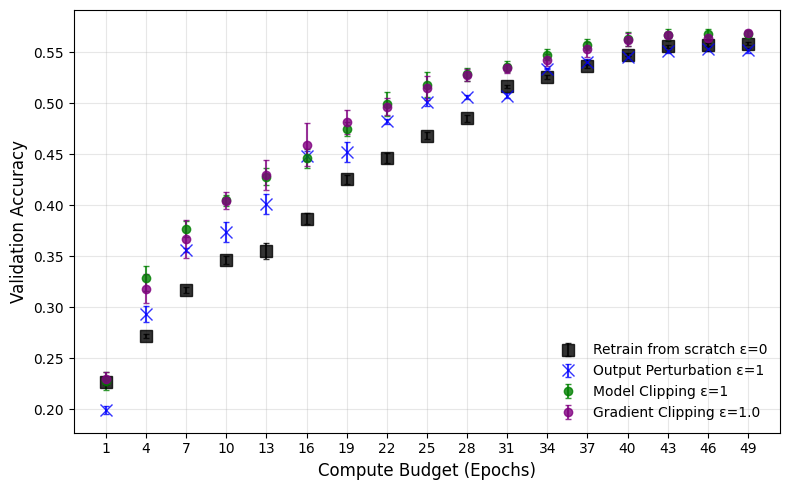

In [ ]:
epochs_to_plot = [i for i in range(1, 51, 3)]
val_acc_data = {}
cc1_best_configs_cifar = []
cc1_df_cifar_plot = cc1_df_cifar[cc1_df_cifar['delta'] <= 1e-5]

fig, ax = plt.subplots(figsize=(8, 5))

for model_name in cc1_df_cifar_plot.model_name.unique():
    val_acc_data.clear()

    val_acc_data[0] = {e: [] for e in epochs_to_plot}
    df_baseline_cifar = baseline_df_cifar[(baseline_df_cifar.model_name == model_name) & (baseline_df_cifar['eps'] <= 0)]
    for _, run in df_baseline_cifar.iterrows():
        for e in epochs_to_plot:
            val_acc = run[f'val_acc_history_{e}']
            val_acc_data[0][e].append(val_acc)
            plotted_run_ids['retrain-cifar'].append(run["run_name"])

    dp_baseline = dp_baseline_df_cifar[(dp_baseline_df_cifar.model_name == model_name)]
    for eps in [1]:
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        df_eps = dp_baseline[(dp_baseline.model_name == model_name) & (dp_baseline.eps == eps)]

        for e in epochs_to_plot:
            grouped = df_eps.groupby(['init_model_clip'])
            filtered = grouped.filter(lambda x: len(x) >= 4)
            if not filtered.empty:
                group_means = filtered.groupby(['init_model_clip'])[f'val_acc_history_{e}'].mean()
                if not group_means.empty:
                    best_group_idx = group_means.idxmax()
                    best_runs = df_eps[
                        (df_eps.init_model_clip == best_group_idx)
                    ]
                    acc_values = best_runs[f'val_acc_history_{e}'].tolist()
                    plotted_run_ids['dp-baseline-cifar'].extend(best_runs['run_name'].tolist())
                    val_acc_data[eps][e] = acc_values

    eps_values = sorted(val_acc_data.keys())
    color_map = {0: 'black', 1: 'blue'}

    for eps in eps_values:
        means, confs, x_vals = [], [], []
        for e in epochs_to_plot:
            acc_data = val_acc_data[eps][e]
            if acc_data:
                mean = np.mean(acc_data)
                n = len(acc_data)
                std_err = 1.96 * (np.std(acc_data) / np.sqrt(n)) if n > 0 else 0
                means.append(mean)
                confs.append(std_err)
                x_vals.append(e)
        if len(x_vals) == 0:
            continue
        if eps == 0:
            ax.errorbar(x_vals, means, yerr=confs, fmt='s', color=color_map[eps],
                        markersize=8, capsize=2, label='Retrain from scratch ε=0', alpha=0.8)
        else:
            ax.errorbar(x_vals, means, yerr=confs, fmt='x', color=color_map[eps],
                        markersize=8, capsize=2, label=f'Output Perturbation ε={eps}', alpha=0.8)

    for eps in [1]:
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        df_eps = cc1_df_cifar_plot[(cc1_df_cifar_plot.model_name == model_name) & (cc1_df_cifar_plot.eps == eps)]

        for e in epochs_to_plot:
            grouped = df_eps.groupby(['model_clip', 'grad_clip', 'sigma', 'init_clip', 'lr', 'regularization'])
            filtered = grouped.filter(lambda x: len(x) >= 4)
            if not filtered.empty:
                group_means = filtered.groupby(
                    ['model_clip', 'grad_clip', 'sigma', 'init_clip', 'lr', 'regularization']
                )[f'val_acc_history_{e}'].mean()
                if not group_means.empty:
                    best_group_idx = group_means.idxmax()
                    best_runs = df_eps[
                        (df_eps.model_clip == best_group_idx[0]) &
                        (df_eps.grad_clip == best_group_idx[1]) &
                        (df_eps.sigma == best_group_idx[2]) &
                        (df_eps.init_clip == best_group_idx[3]) &
                        (df_eps.lr == best_group_idx[4]) &
                        (df_eps.regularization == best_group_idx[5])
                    ]
                    acc_values = best_runs[f'val_acc_history_{e}'].tolist()
                    plotted_run_ids['cc-cifar'].extend(best_runs["run_name"].tolist())
                    val_acc_data[eps][e] = acc_values

    color_map[1] = 'green'
    for eps in eps_values:
        means, confs, x_vals = [], [], []
        for e in epochs_to_plot:
            acc_data = val_acc_data[eps][e]
            if acc_data:
                mean = np.mean(acc_data)
                n = len(acc_data)
                std_err = 1.96 * (np.std(acc_data) / np.sqrt(n)) if n > 0 else 0
                means.append(mean)
                confs.append(std_err)
                x_vals.append(e)

        if eps != 0:
            ax.errorbar(x_vals, means, yerr=confs, fmt='o', color=color_map[eps],
                        markersize=6, capsize=2, label=f'Model Clipping ε={eps}', alpha=0.8)

val_acc_data.clear()
pabi_df_cifar['eps'] = pabi_df_cifar['eps'].apply(lambda x: round(x, 4))
pabi_df_cifar['eps'] = pabi_df_cifar['eps'].apply(lambda x: np.round(x))
print(pabi_df_cifar['eps'].unique())
pabi_best_configs_cifar = []
for model_name in pabi_df_cifar.model_name.unique():
    val_acc_data = {}
    df_model = pabi_df_cifar[pabi_df_cifar.model_name == model_name]
    for eps in df_model.eps.unique():
        if eps > 2:
            continue
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        eps_df = df_model[df_model.eps == eps]

        for e in epochs_to_plot:
            filtered = eps_df.groupby([
                'config_regularization',
                'config_grad_clip',
                'config_eta',
                'config_kappa'
            ]).filter(lambda x: len(x) >= 4).groupby(['config_regularization', 'config_grad_clip', 'config_eta', 'config_kappa']).agg({f'val_acc_history_{e}': 'mean'})

            valid_groups = filtered[filtered.index.map(lambda x: x[2] * x[0] < 1)]

            if not valid_groups.empty:
                best_group = valid_groups[f'val_acc_history_{e}'].idxmax()
                best_runs = eps_df[
                    (eps_df.config_regularization == best_group[0]) &
                    (eps_df.config_grad_clip == best_group[1]) &
                    (eps_df.config_eta == best_group[2]) &
                    (eps_df.config_kappa == best_group[3])
                ]
                plotted_run_ids['pabi-cifar'].extend(best_runs["run_name"].tolist())
                val_acc_data[eps][e].extend(best_runs[f'val_acc_history_{e}'].tolist())

    eps_values = sorted(val_acc_data.keys())
    color_map[1] = 'purple'  # Different color for gradient clipping

    for eps in eps_values:
        means, errs, x_pos = [], [], []
        for e in epochs_to_plot:
            acc_values = val_acc_data[eps][e]
            if acc_values:
                means.append(np.mean(acc_values))
                errs.append(1.96 * np.std(acc_values) / np.sqrt(len(acc_values)))
                x_pos.append(e)
        if len(x_pos) == 0:
            continue
        if eps != 0:
            ax.errorbar(x_pos, means, yerr=errs, fmt='o',
                        color=color_map[eps], markersize=6, capsize=2,
                        label=f'Gradient Clipping ε={eps}', alpha=0.8)

ax.set_xlabel('Compute Budget (Epochs)', fontsize=12)
ax.set_ylabel('Validation Accuracy', fontsize=12)
ax.legend(ncol=1, fontsize=10, loc='lower right', bbox_to_anchor=(1, 0), frameon=False)
ax.grid(True, alpha=0.3)
ax.set_xticks(epochs_to_plot)
plt.tight_layout()
plt.show()

[ 10.  50.   5. 100.   1.]


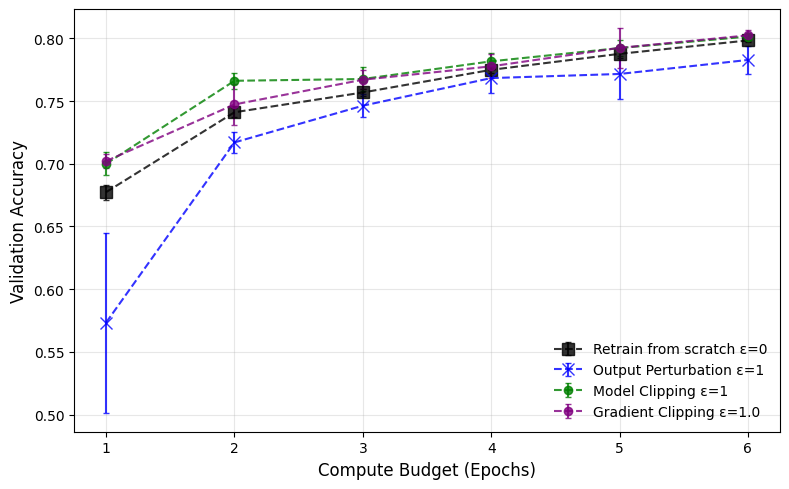

In [ ]:
epochs_to_plot = [i for i in range(1, 7, 1)]
val_acc_data = {}
cc1_best_configs = []
cc1_df_plot = cc1_df[cc1_df['delta'] <= 1e-5]

fig, ax = plt.subplots(figsize=(8, 5))

for model_name in cc1_df_plot.model_name.unique():
    val_acc_data.clear()

    val_acc_data[0] = {e: [] for e in epochs_to_plot}
    df_baseline = baseline_df[(baseline_df.model_name == model_name) & (baseline_df['eps'] <= 0)]
    for _, run in df_baseline.iterrows():
        for e in epochs_to_plot:
            val_acc = run[f'val_acc_history_{e}']
            plotted_run_ids['retrain-mnist'].append(run["run_name"])
            val_acc_data[0][e].append(val_acc)

    dp_baseline = dp_baseline_df[(dp_baseline_df.model_name == model_name)]
    for eps in [1]:
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        df_eps = dp_baseline[(dp_baseline.model_name == model_name) & (dp_baseline.eps == eps)]

        for e in epochs_to_plot:
            grouped = df_eps.groupby(['init_model_clip'])
            filtered = grouped.filter(lambda x: len(x) >= 4)
            if not filtered.empty:
                group_means = filtered.groupby(['init_model_clip'])[f'val_acc_history_{e}'].mean()
                if not group_means.empty:
                    best_group_idx = group_means.idxmax()
                    best_runs = df_eps[
                        (df_eps.init_model_clip == best_group_idx)
                    ]
                    acc_values = best_runs[f'val_acc_history_{e}'].tolist()
                    plotted_run_ids['dp-baseline-mnist'].extend(best_runs['run_name'].tolist())
                    val_acc_data[eps][e] = acc_values

    eps_values = sorted(val_acc_data.keys())
    color_map = {0: 'black', 1: 'blue'}

    for eps in eps_values:
        means, confs, x_vals = [], [], []
        for e in epochs_to_plot:
            acc_data = val_acc_data[eps][e]
            if acc_data:
                mean = np.mean(acc_data)
                n = len(acc_data)
                std_err = 1.96 * (np.std(acc_data) / np.sqrt(n)) if n > 0 else 0
                means.append(mean)
                confs.append(std_err)
                x_vals.append(e)
        if len(x_vals) == 0:
            continue
        if eps == 0:
            ax.errorbar(x_vals, means, yerr=confs, fmt='s', color=color_map[eps],
                        markersize=8, capsize=2, label='Retrain from scratch ε=0', alpha=0.8, linestyle="--")
        else:
            ax.errorbar(x_vals, means, yerr=confs, fmt='x', color=color_map[eps],
                        markersize=8, capsize=2, label=f'Output Perturbation ε={eps}', alpha=0.8, linestyle="--")

    for eps in [1]:
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        df_eps = cc1_df_plot[(cc1_df_plot.model_name == model_name) & (cc1_df_plot.eps == eps)]

        for e in epochs_to_plot:
            grouped = df_eps.groupby(['model_clip', 'grad_clip', 'sigma', 'init_clip', 'lr', 'regularization'])
            filtered = grouped.filter(lambda x: len(x) >= 4)
            if not filtered.empty:
                group_means = filtered.groupby(
                    ['model_clip', 'grad_clip', 'sigma', 'init_clip', 'lr', 'regularization']
                )[f'val_acc_history_{e}'].mean()
                if not group_means.empty:
                    best_group_idx = group_means.idxmax()
                    best_runs = df_eps[
                        (df_eps.model_clip == best_group_idx[0]) &
                        (df_eps.grad_clip == best_group_idx[1]) &
                        (df_eps.sigma == best_group_idx[2]) &
                        (df_eps.init_clip == best_group_idx[3]) &
                        (df_eps.lr == best_group_idx[4]) &
                        (df_eps.regularization == best_group_idx[5])
                    ]
                    plotted_run_ids['cc-mnist'].extend(best_runs['run_name'].tolist())
                    acc_values = best_runs[f'val_acc_history_{e}'].tolist()
                    val_acc_data[eps][e] = acc_values

    color_map[1] = 'green'
    for eps in eps_values:
        means, confs, x_vals = [], [], []
        for e in epochs_to_plot:
            acc_data = val_acc_data[eps][e]
            if acc_data:
                mean = np.mean(acc_data)
                n = len(acc_data)
                std_err = 1.96 * (np.std(acc_data) / np.sqrt(n)) if n > 0 else 0
                means.append(mean)
                confs.append(std_err)
                x_vals.append(e)

        if eps != 0:
            ax.errorbar(x_vals, means, yerr=confs, fmt='o', color=color_map[eps],
                        markersize=6, capsize=2, label=f'Model Clipping ε={eps}', alpha=0.8, linestyle="--")

val_acc_data.clear()
pabi_df['eps'] = pabi_df['eps'].apply(lambda x: round(x, 4))
pabi_df['eps'] = pabi_df['eps'].apply(lambda x: np.round(x))
print(pabi_df['eps'].unique())
pabi_best_configs = []
for model_name in pabi_df.model_name.unique():
    val_acc_data = {}
    df_model = pabi_df[pabi_df.model_name == model_name]
    for eps in df_model.eps.unique():
        if eps > 2:
            continue
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        eps_df = df_model[df_model.eps == eps]

        for e in epochs_to_plot:
            filtered = eps_df.groupby([
                'config_regularization',
                'config_grad_clip',
                'config_eta',
                'config_kappa'
            ]).filter(lambda x: len(x) >= 4).groupby(['config_regularization', 'config_grad_clip', 'config_eta', 'config_kappa']).agg({f'val_acc_history_{e}': 'mean'})

            valid_groups = filtered[filtered.index.map(lambda x: x[2] * x[0] < 1)]

            if not valid_groups.empty:
                best_group = valid_groups[f'val_acc_history_{e}'].idxmax()
                best_runs = eps_df[
                    (eps_df.config_regularization == best_group[0]) &
                    (eps_df.config_grad_clip == best_group[1]) &
                    (eps_df.config_eta == best_group[2]) &
                    (eps_df.config_kappa == best_group[3])
                ]
                plotted_run_ids['pabi-mnist'].extend(best_runs['run_name'].tolist())
                val_acc_data[eps][e].extend(best_runs[f'val_acc_history_{e}'].tolist())

    eps_values = sorted(val_acc_data.keys())
    color_map[1] = 'purple'  # Different color for gradient clipping

    for eps in eps_values:
        means, errs, x_pos = [], [], []
        for e in epochs_to_plot:
            acc_values = val_acc_data[eps][e]
            if acc_values:
                means.append(np.mean(acc_values))
                errs.append(1.96 * np.std(acc_values) / np.sqrt(len(acc_values)))
                x_pos.append(e)
        if len(x_pos) == 0:
            continue
        if eps != 0:
            ax.errorbar(x_pos, means, yerr=errs, fmt='o',
                        color=color_map[eps], markersize=6, capsize=2,
                        label=f'Gradient Clipping ε={eps}', alpha=0.8, linestyle="--")

ax.set_xlabel('Compute Budget (Epochs)', fontsize=12)
ax.set_ylabel('Validation Accuracy', fontsize=12)
ax.legend(ncol=1, fontsize=10, loc='lower right', bbox_to_anchor=(1, 0), frameon=False)
ax.grid(True, alpha=0.3)
ax.set_xticks(epochs_to_plot)
plt.tight_layout()
plt.show()

In [23]:
for x,y in plotted_run_ids.items():
    print(f'{x}: {len(y)=}')

baseline-cifar: len(y)=16
dp-baseline-cifar: len(y)=12
pabi-cifar: len(y)=44
cc-cifar: len(y)=52
baseline-mnist: len(y)=16
dp-baseline-mnist: len(y)=4
pabi-mnist: len(y)=8
cc-mnist: len(y)=25


In [ ]:
import os
import shutil

base_log_dir = "/lfs/mercury1/0/animjha/unlearning/logs"
target_base = "/lfs/mercury1/0/animjha/unlearning/budget_curve_runs"

for key, run_ids in plotted_run_ids.items():
    target_folder = os.path.join(target_base, key)
    os.makedirs(target_folder, exist_ok=True)
    
    for r in run_ids:
        src = os.path.join(base_log_dir, r, "config.yaml")
        dst = os.path.join(target_folder, f"{r}_config.yaml")
        try:
            shutil.copy(src, dst)
        except Exception as e:
            print(f"Error copying from {src} to {dst}: {e}")

In [2]:
import os
import shutil

base_log_dir = "/lfs/mercury1/0/animjha/unlearning/logs"
target_base = "/lfs/mercury1/0/animjha/unlearning/convergence_curve_runs"

# pabi runs
pabi_run_ids = ["qvnx4b61", "uqgv8fa7","qsjcrpma","bwvae5ba"]

pabi_target_folder = os.path.join(target_base, "pabi")
os.makedirs(pabi_target_folder, exist_ok=True)

for r in pabi_run_ids:
    src = os.path.join(base_log_dir, r, "config.yaml")
    dst = os.path.join(pabi_target_folder, f"{r}_config.yaml")
    try:
        shutil.copy(src, dst)
    except Exception as e:
        print(f"Error copying from {src} to {dst}: {e}")

# retrain runs
retrain_run_ids = ["tiljpio6","frws6ybn","ao50qica","llty3x0c"]
retrain_target_folder = os.path.join(target_base, "retrain")
os.makedirs(retrain_target_folder, exist_ok=True)

for r in retrain_run_ids:
    src = os.path.join(base_log_dir, r, "config.yaml")
    dst = os.path.join(retrain_target_folder, f"{r}_config.yaml")
    try:
        shutil.copy(src, dst)
    except Exception as e:
        print(f"Error copying from {src} to {dst}: {e}")


# Convergence Curves


In [ ]:
pabi_run_ids = ["qvnx4b61", "uqgv8fa7","qsjcrpma","bwvae5ba"]
retrain_run_ids = ["tiljpio6","frws6ybn","ao50qica","llty3x0c"]

entity, project = "unlearning-dynamics", "unlearning-dp-f3"
f3_runs = api.runs(f"{entity}/{project}")


def process_runs(run_ids, is_pabi=True):
    """Process multiple runs and organize data by phase (noisy/finetuning)"""
    data = {
        'noisy': defaultdict(list),
        'finetune': defaultdict(list),
        'train_accs': [],
        'ft_starts': []
    }
    
    for run_id in run_ids:
        run = [r for r in f3_runs if r.id == run_id][0]
        df = pd.DataFrame(run.scan_history(keys=["Val (Unlearn)_accuracy", "unlearn_epoch"]))
        df.sort_values(by="unlearn_epoch", inplace=True)
        df = df[df["unlearn_epoch"] <= 30]
        
        if is_pabi:
            num_noisy = run.summary["pabi_steps"]
            train_acc = run.summary["Val (Train)_accuracy"]
            data['train_accs'].append(train_acc)
            
            noisy_df = df.iloc[:num_noisy-1]
            ft_df = df.iloc[num_noisy-1:]
            
            ft_start = noisy_df["unlearn_epoch"].iloc[-1] if num_noisy > 0 else 0
            data['ft_starts'].append(ft_start)
            num_noisy_steps = run.summary["pabi_steps"]
            config_train_epoch = run.config["training"]["epochs"]
            config_kappa  = run.config["unlearning"]["init_model_clip"]
            config_grad_clip = run.config["unlearning"]["iteration"]["grad_clip"]
            config_eps_renyi = run.config["unlearning"]["iteration"]["epsilon_renyi_target"]
            config_eta=run.config["unlearning"]["max_lr"]
            config_lamb = run.config["unlearning"]["weight_decay"]
            print(f'{config_eps_renyi=} {config_eta=} {config_kappa=} {config_grad_clip=} {config_lamb=}')
        else:
            ft_df = df
            data['train_accs'].append(run.summary["Val (Post Unlearning Setup)_accuracy"])
            num_noisy = 0  # No noisy steps for retrain

        for _, row in (noisy_df.iterrows() if is_pabi else []):
            epoch = row["unlearn_epoch"]
            data['noisy'][epoch].append(row["Val (Unlearn)_accuracy"])
            
        for _, row in ft_df.iterrows():
            epoch = row["unlearn_epoch"]
            data['finetune'][epoch].append(row["Val (Unlearn)_accuracy"])

    return data

pabi_data = process_runs(pabi_run_ids, is_pabi=True)
retrain_data = process_runs(retrain_run_ids, is_pabi=False)


config_eps_renyi=1 config_eta=0.01 config_kappa=20 config_grad_clip=10 config_lamb=50
config_eps_renyi=1 config_eta=0.01 config_kappa=20 config_grad_clip=10 config_lamb=50
config_eps_renyi=1 config_eta=0.01 config_kappa=20 config_grad_clip=10 config_lamb=50
config_eps_renyi=1 config_eta=0.01 config_kappa=20 config_grad_clip=10 config_lamb=50


/tmp/user/24125/ipykernel_4116403/4268079144.py:46: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(0, post_acc_mean, color='purple', s=40, marker='x',


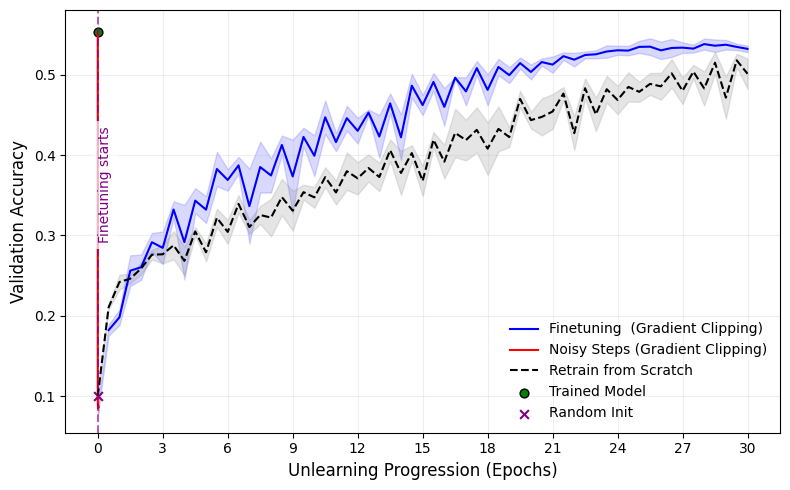

In [115]:

def calculate_stats(data_dict):
    """Calculate means and confidence intervals"""
    epochs = sorted(data_dict.keys())
    means, uppers, lowers = [], [], []
    for epoch in epochs:
        values = data_dict[epoch]
        mean = np.mean(values)
        std_err = 1.96 * np.std(values)/np.sqrt(len(values)) if len(values) > 1 else 0
        means.append(mean)
        uppers.append(mean + std_err)
        lowers.append(mean - std_err)
    return epochs, means, uppers, lowers

# Calculate statistics for each phase
pabi_noisy_epochs, pabi_noisy_means, pabi_noisy_upper, pabi_noisy_lower = calculate_stats(pabi_data['noisy'])
pabi_ft_epochs, pabi_ft_means, pabi_ft_upper, pabi_ft_lower = calculate_stats(pabi_data['finetune'])
retrain_epochs, retrain_means, retrain_upper, retrain_lower = calculate_stats(retrain_data['finetune'])

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))


# Finetuning phase
ax.plot(pabi_ft_epochs, pabi_ft_means, color='blue', label='Finetuning  (Gradient Clipping)')
ax.fill_between(pabi_noisy_epochs+pabi_ft_epochs, pabi_noisy_lower+pabi_ft_lower, pabi_noisy_upper+pabi_ft_upper, 
                color='blue', alpha=0.15, label='_nolegend_')


train_acc_mean = np.mean(pabi_data['train_accs'])
train_acc_ci = 1.96 * np.std(pabi_data['train_accs']) / np.sqrt(len(pabi_run_ids))
post_acc_mean = np.mean(retrain_data['train_accs'])
post_acc_ci = 1.96 * np.std(retrain_data['train_accs']) / np.sqrt(len(retrain_run_ids))
# Plot PABI components with confidence bands
# Noisy phase
ax.plot([0]+pabi_noisy_epochs, [train_acc_mean]+pabi_noisy_means, color='red', label='Noisy Steps (Gradient Clipping)')
ax.fill_between([0]+pabi_noisy_epochs, [train_acc_mean-train_acc_ci]+pabi_noisy_lower, [train_acc_mean+train_acc_ci]+pabi_noisy_upper, 
                color='red', alpha=0.15, label='_nolegend_')

ax.plot([0]+retrain_epochs, [post_acc_mean]+retrain_means, color='black', linestyle='--', 
        label='Retrain from Scratch')
ax.fill_between([0]+retrain_epochs, [post_acc_mean-post_acc_ci]+retrain_lower, [post_acc_mean+post_acc_ci]+retrain_upper, 
                color='gray', alpha=0.2, label='_nolegend_')

ax.scatter(0, train_acc_mean, color='green', s=40, 
           label='Trained Model', zorder=1, edgecolors='black')
ax.scatter(0, post_acc_mean, color='purple', s=40, marker='x', 
           label='Random Init', zorder=1, edgecolors='black')


if pabi_data['ft_starts']:
    avg_ft_start = np.mean(pabi_data['ft_starts'])
    ax.axvline(avg_ft_start, color='purple', linestyle='--', alpha=0.6)
    ax.text(avg_ft_start, ax.get_ylim()[1]*0.75, 'Finetuning starts', 
            color='purple',
            verticalalignment='top', horizontalalignment='left', fontsize=10, rotation=90, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))



ax.set_xlabel('Unlearning Progression (Epochs)', fontsize=12)
ax.set_ylabel('Validation Accuracy', fontsize=12)
ax.set_xticks(np.arange(0, max(pabi_ft_epochs[-1], retrain_epochs[-1]+1), 3))
ax.grid(True, alpha=0.2)
ax.legend(fontsize=10, loc='lower right', bbox_to_anchor=(1, 0), frameon=False)
plt.tight_layout()
plt.show()

# DP-SGD Rebuttal

In [13]:
plotted_run_ids_fc = {
    "retrain-cifar10-fc": [],
    "pabi-cifar10-fc": [],
    "dp-sgd-cifar10-fc": [],
    "retrain-cifar100-fc": [],
    "pabi-cifar100-fc": [],
    "dp-sgd-cifar100-fc": [],
}

[1.]
eps=0, means=[0.6829589754343033, 0.7912597805261612, 0.810839831829071, 0.8267089873552322, 0.8267089873552322, 0.8355956971645355, 0.8425781279802322, 0.846484363079071, 0.846484363079071, 0.852294921875, 0.8538085967302322, 0.8538085967302322, 0.8538085967302322, 0.8553222715854645, 0.8555664122104645, 0.8571777492761612, 0.8613281399011612, 0.8641601651906967, 0.8641601651906967, 0.8648925870656967, 0.8648925870656967, 0.8650390654802322, 0.8673828095197678, 0.8694824129343033, 0.8694824129343033, 0.8694824129343033, 0.8694824129343033, 0.870654284954071, 0.8717773258686066, 0.871874988079071, 0.8725585788488388, 0.8725585788488388, 0.8732421845197678, 0.8737304657697678, 0.8751464784145355, 0.8751464784145355, 0.8758789002895355, 0.8759765625, 0.8769042938947678, 0.8769042938947678, 0.8772949129343033, 0.8772949129343033, 0.8777831941843033, 0.8777831941843033, 0.8778320252895355, 0.8781249970197678, 0.8781249970197678, 0.8782226592302322, 0.8782226592302322, 0.87822265923023

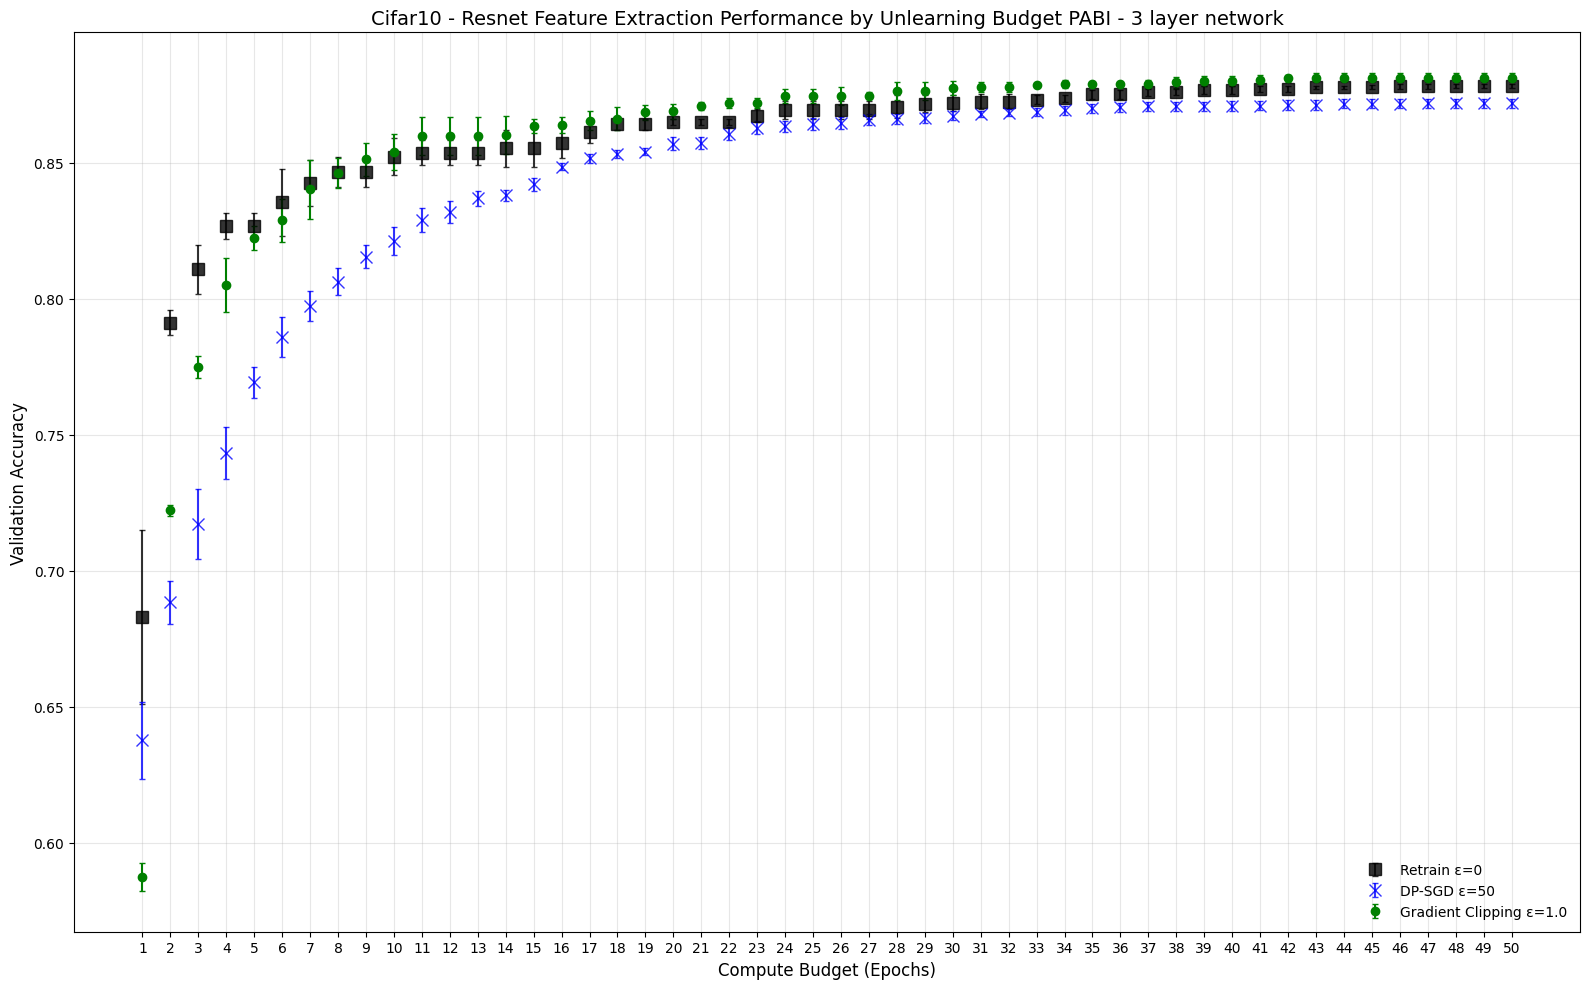

In [14]:
import matplotlib.pyplot as plt
import numpy as np
epochs_to_plot = [i for i in range(1, 51,1)]
val_acc_data = {}
iteration_cifar10_fc_df['eps']=iteration_cifar10_fc_df['eps'].apply(lambda x:np.round(x))
print(iteration_cifar10_fc_df['eps'].unique())
best_groups =set()
for model_name in iteration_cifar10_fc_df.model_name.unique():
    fig, ax = plt.subplots(figsize=(16, 10))
    val_acc_data.clear()
    
    val_acc_data[0] = {e: [] for e in epochs_to_plot}
    df_baseline = retrain_cifar10_fc_df[(retrain_cifar10_fc_df.model_name == model_name) & (retrain_cifar10_fc_df['eps'] <= 0)]
    for _, run in df_baseline.iterrows():
        for e in epochs_to_plot:
            val_acc = run[f'val_acc_history_{e}']
            plotted_run_ids_fc['retrain-cifar10-fc'].append(run["run_name"])
            val_acc_data[0][e].append(val_acc)


    group_eps=dpsgd_cifar10_feature_df["eps"].max()
    val_acc_data[group_eps] = {e: [] for e in epochs_to_plot}

    for _, run in dpsgd_cifar10_feature_df.iterrows():
        for e in epochs_to_plot:
            val_acc = run[f'val_acc_history_{e}']
            plotted_run_ids_fc['dp-sgd-cifar10-fc'].append(run["run_name"])
            val_acc_data[group_eps][e].append(val_acc)


    eps_values = sorted(val_acc_data.keys())
    color_map = {0: 'black', group_eps: 'blue'}

    for eps in eps_values:
        means, confs, x_vals = [], [], []
        for e in epochs_to_plot:
            acc_data = val_acc_data[eps][e]
            if acc_data:
                mean = np.mean(acc_data)
                n = len(acc_data)
                std_err = 1.96 * (np.std(acc_data) / np.sqrt(n)) if n > 0 else 0
                means.append(mean)
                confs.append(std_err)
                x_vals.append(e)
        print(f'{eps=}, {means=}, {confs=}, {x_vals=}')
        if len(x_vals) == 0:
            continue
        if eps == 0:
            ax.errorbar(x_vals, means, yerr=confs, fmt='s', color=color_map[eps],
                        markersize=8, capsize=2, label='Retrain ε=0', alpha=0.8)
        else:
            ax.errorbar(x_vals, means, yerr=confs, fmt='x', color=color_map[eps],
                        markersize=8, capsize=2, label=f'DP-SGD ε={eps}', alpha=0.8)
    
    val_acc_data ={}
    df_model = iteration_cifar10_fc_df[iteration_cifar10_fc_df.model_name == model_name]
    for eps in df_model.eps.unique():
        if eps>2:
            continue
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        eps_df = df_model[df_model.eps == eps]
        
        for e in epochs_to_plot:
            filtered = eps_df.groupby([
                'config_regularization', 
                'config_grad_clip', 
                'config_eta', 
                'config_kappa'
            ]).filter(lambda x: len(x) >= 4).groupby(['config_regularization', 'config_grad_clip', 'config_eta', 'config_kappa']).agg({f'val_acc_history_{e}': 'mean'})
                
            valid_groups = filtered[filtered.index.map(lambda x: x[2] * x[0] < 1)]
            
            if not valid_groups.empty:
                best_group = valid_groups[f'val_acc_history_{e}'].idxmax()
                best_runs = eps_df[
                    (eps_df.config_regularization == best_group[0]) &
                    (eps_df.config_grad_clip == best_group[1]) &
                    (eps_df.config_eta == best_group[2]) &
                    (eps_df.config_kappa == best_group[3])
                ]
                best_groups.add(best_group)
                plotted_run_ids_fc['pabi-cifar10-fc'].extend(best_runs['run_name'].tolist())
                val_acc_data[eps][e].extend(best_runs[f'val_acc_history_{e}'].tolist())

    eps_values = sorted(val_acc_data.keys())
    color_map[1] = 'green'

    for eps in eps_values:
        means, errs, x_pos = [], [], []
        for e in epochs_to_plot:
            acc_values = val_acc_data[eps][e]
            if acc_values:
                means.append(np.mean(acc_values))
                errs.append(1.96 * np.std(acc_values)/np.sqrt(len(acc_values)))
                x_pos.append(e)
        if len(x_pos) == 0:
            continue
        if eps != 0:
            ax.errorbar(x_pos, means, yerr=errs, fmt='o',
                       color=color_map[eps], markersize=6, capsize=2,
                       label=f'Gradient Clipping ε={eps}')

    ax.set_xlabel('Compute Budget (Epochs)', fontsize=12)
    ax.set_ylabel('Validation Accuracy', fontsize=12)
    ax.set_title('Cifar10 - Resnet Feature Extraction Performance by Unlearning Budget PABI - 3 layer network', fontsize=14)
    ax.legend(ncol=1, fontsize=10, loc='lower right', bbox_to_anchor=(1,0), frameon=False)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(epochs_to_plot)
    plt.tight_layout()
    plt.show()

[1.]
eps=0, means=[0.02587890624999995, 0.061474610120058025, 0.17226562276482577, 0.28569335490465164, 0.37919921427965164, 0.41337890177965164, 0.4283203110098839, 0.45292969048023224, 0.45292969048023224, 0.45683594048023224, 0.4718261733651161, 0.4755859375, 0.4755859375, 0.48051758110523224, 0.4983886778354645, 0.49946289509534836, 0.5011718794703484, 0.5185546800494194, 0.525146484375, 0.5303710848093033, 0.532519519329071, 0.551025390625, 0.5569335967302322, 0.5569335967302322, 0.5660156309604645, 0.5731933563947678, 0.5731933563947678, 0.5778320282697678, 0.5819824188947678, 0.5823242217302322, 0.5931152403354645, 0.5932128876447678, 0.5953125059604645, 0.6002929657697678, 0.6022460907697678, 0.605712890625, 0.6058105528354645, 0.6089843809604645, 0.6124023348093033, 0.6131835877895355, 0.6161132752895355, 0.6181640475988388, 0.61865234375, 0.61865234375, 0.61865234375, 0.6191894561052322, 0.6192871034145355, 0.6192871034145355, 0.6192871034145355, 0.6192871034145355], confs=[0

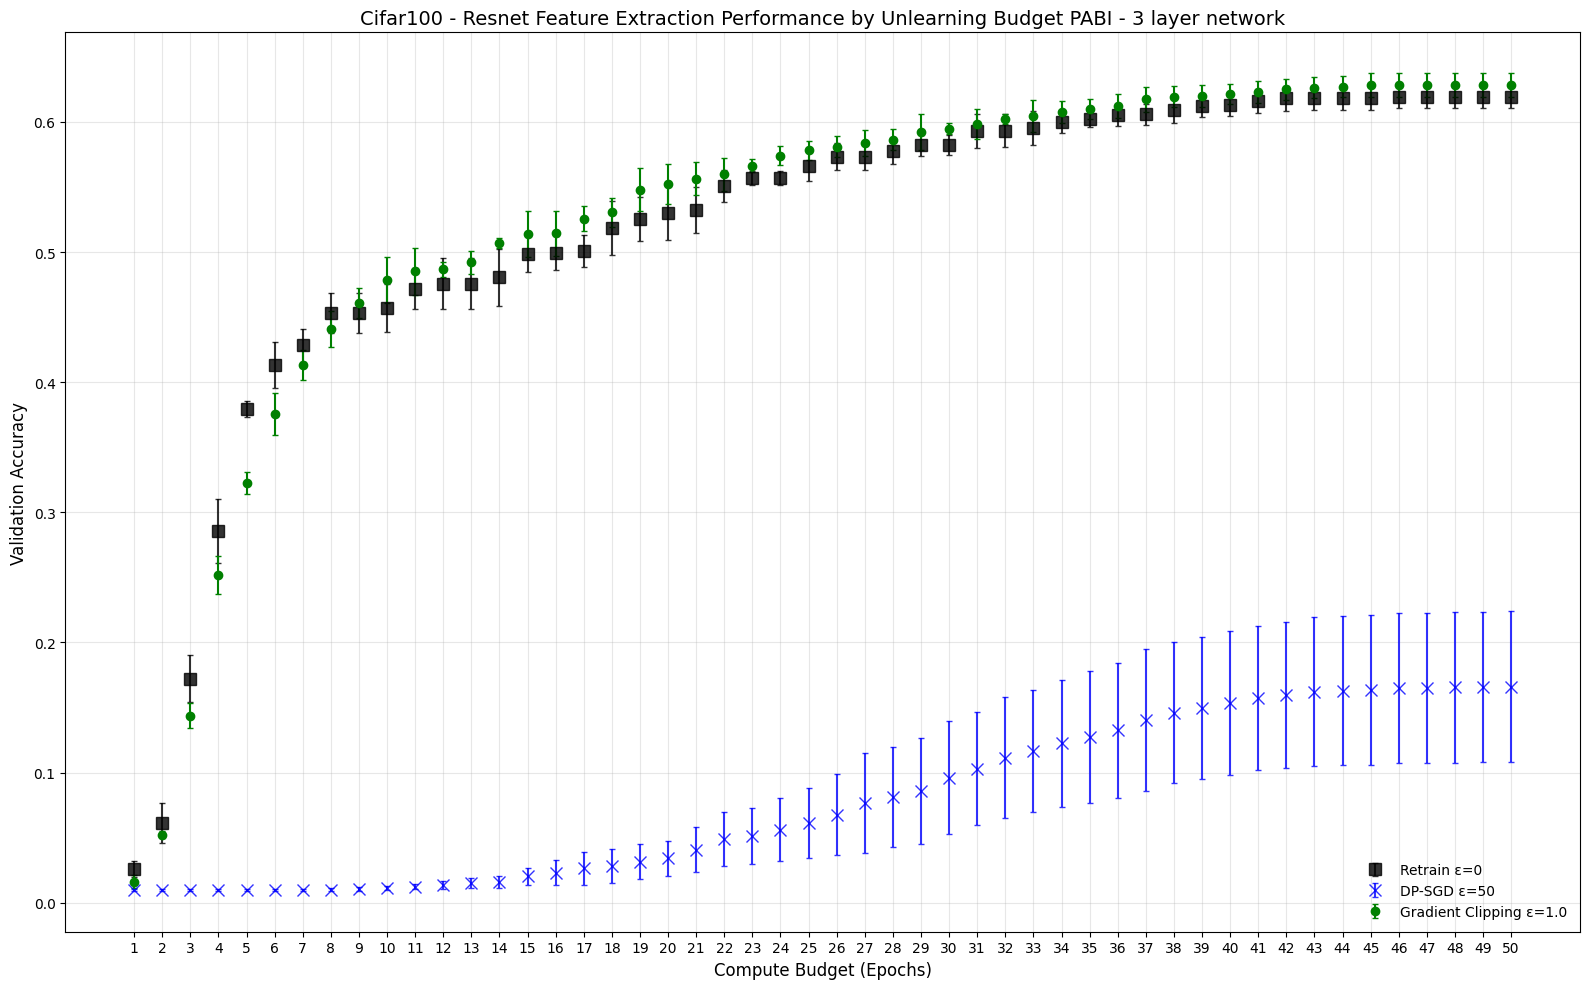

In [15]:
epochs_to_plot = [i for i in range(1, 51,1)]
val_acc_data = {}
iteration_cifar100_df['eps']=iteration_cifar100_df['eps'].apply(lambda x:np.round(x))
print(iteration_cifar100_df['eps'].unique())
best_groups =set()
for model_name in iteration_cifar100_df.model_name.unique():
    fig, ax = plt.subplots(figsize=(16, 10))
    val_acc_data.clear()
    
    val_acc_data[0] = {e: [] for e in epochs_to_plot}
    df_baseline = retrain_cifar100_df[(retrain_cifar100_df.model_name == model_name) & (retrain_cifar100_df['eps'] <= 0)]
    for _, run in df_baseline.iterrows():
        for e in epochs_to_plot:
            val_acc = run[f'val_acc_history_{e}']
            plotted_run_ids_fc['retrain-cifar100-fc'].append(run["run_name"])
            val_acc_data[0][e].append(val_acc)

    group_eps=dpsgd_cifar100_df["eps"].max()
    val_acc_data[group_eps] = {e: [] for e in epochs_to_plot}

    for _, run in dpsgd_cifar100_df.iterrows():
        for e in epochs_to_plot:
            val_acc = run[f'val_acc_history_{e}']
            plotted_run_ids_fc['dp-sgd-cifar100-fc'].append(run["run_name"])
            val_acc_data[group_eps][e].append(val_acc)

    eps_values = sorted(val_acc_data.keys())
    color_map = {0: 'black', group_eps: 'blue'}

    for eps in eps_values:
        means, confs, x_vals = [], [], []
        for e in epochs_to_plot:
            acc_data = val_acc_data[eps][e]
            if acc_data:
                if eps==1:
                    print(acc_data, eps)
                mean = np.mean(acc_data)
                n = len(acc_data)
                std_err = 1.96 * (np.std(acc_data) / np.sqrt(n)) if n > 0 else 0
                means.append(mean)
                confs.append(std_err)
                x_vals.append(e)
        print(f'{eps=}, {means=}, {confs=}, {x_vals=}')
        if len(x_vals) == 0:
            continue
        if eps == 0:
            ax.errorbar(x_vals, means, yerr=confs, fmt='s', color=color_map[eps],
                        markersize=8, capsize=2, label='Retrain ε=0', alpha=0.8)
        else:
            ax.errorbar(x_vals, means, yerr=confs, fmt='x', color=color_map[eps],
                        markersize=8, capsize=2, label=f'DP-SGD ε={eps}', alpha=0.8)
    
    val_acc_data ={}
    df_model = iteration_cifar100_df[iteration_cifar100_df.model_name == model_name]
    for eps in df_model.eps.unique():
        if eps>2:
            continue
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        eps_df = df_model[df_model.eps == eps]
        
        for e in epochs_to_plot:
            filtered = eps_df.groupby([
                'config_regularization', 
                'config_grad_clip', 
                'config_eta', 
                'config_kappa'
            ]).filter(lambda x: len(x) >= 4).groupby(['config_regularization', 'config_grad_clip', 'config_eta', 'config_kappa']).agg({f'val_acc_history_{e}': 'mean'})
                
            valid_groups = filtered[filtered.index.map(lambda x: x[2] * x[0] < 1)]
            
            if not valid_groups.empty:
                best_group = valid_groups[f'val_acc_history_{e}'].idxmax()
                best_runs = eps_df[
                    (eps_df.config_regularization == best_group[0]) &
                    (eps_df.config_grad_clip == best_group[1]) &
                    (eps_df.config_eta == best_group[2]) &
                    (eps_df.config_kappa == best_group[3])
                ]
                best_groups.add(best_group)
                plotted_run_ids_fc['pabi-cifar100-fc'].extend(best_runs['run_name'].tolist())
                val_acc_data[eps][e].extend(best_runs[f'val_acc_history_{e}'].tolist())

    eps_values = sorted(val_acc_data.keys())
    color_map[1] = 'green'

    for eps in eps_values:
        means, errs, x_pos = [], [], []
        for e in epochs_to_plot:
            acc_values = val_acc_data[eps][e]
            if acc_values:
                means.append(np.mean(acc_values))
                errs.append(1.96 * np.std(acc_values)/np.sqrt(len(acc_values)))
                x_pos.append(e)
        if len(x_pos) == 0:
            continue
        if eps != 0:
            ax.errorbar(x_pos, means, yerr=errs, fmt='o',
                       color=color_map[eps], markersize=6, capsize=2,
                       label=f'Gradient Clipping ε={eps}')

    ax.set_xlabel('Compute Budget (Epochs)', fontsize=12)
    ax.set_ylabel('Validation Accuracy', fontsize=12)
    ax.set_title('Cifar100 - Resnet Feature Extraction Performance by Unlearning Budget PABI - 3 layer network', fontsize=14)
    ax.legend(ncol=1, fontsize=10, loc='lower right', bbox_to_anchor=(1,0), frameon=False)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(epochs_to_plot)
    plt.tight_layout()
    plt.show()

In [17]:
for x,y in plotted_run_ids_fc.items():
    plotted_run_ids_fc[x]=list(set(y))

for x,y in plotted_run_ids_fc.items():
    print(f'{x}: {len(y)=}')

retrain-cifar10-fc: len(y)=4
pabi-cifar10-fc: len(y)=48
dp-sgd-cifar10-fc: len(y)=8
retrain-cifar100-fc: len(y)=4
pabi-cifar100-fc: len(y)=52
dp-sgd-cifar100-fc: len(y)=8


In [ ]:
import os
import shutil

base_log_dir = "/lfs/mercury1/0/animjha/unlearning/logs"
target_base = "/lfs/mercury1/0/animjha/unlearning/dp_sgd_runs"

for key, run_ids in plotted_run_ids_fc.items():
    target_folder = os.path.join(target_base, key)
    os.makedirs(target_folder, exist_ok=True)
    
    for r in run_ids:
        src = os.path.join(base_log_dir, r, "config.yaml")
        dst = os.path.join(target_folder, f"{r}_config.yaml")
        try:
            shutil.copy(src, dst)
        except Exception as e:
            print(f"Error copying from {src} to {dst}: {e}")

# Eps Sweep

In [89]:
with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results_pabi_camera = list(tqdm.tqdm(executor.map(process_pabi_run, pabi_camera_runs), total=len(pabi_camera_runs)))

results_pabi_camera = [r for r in results_pabi_camera if r is not None]

pabi_camera_data = {
    'eps': [r['eps'] for r in results_pabi_camera],
    # 'test_acc': [r['test_acc'] for r in results_pabi_camera],
    'val_acc_history': [r['val_acc_history'] for r in results_pabi_camera],
    'delta': [r['delta'] for r in results_pabi_camera],
    # 'config_eps_renyi': [r['config_eps_renyi'] for r in results_pabi_camera],
    'config_regularization': [r['config_regularization'] for r in results_pabi_camera],
    'config_grad_clip': [r['config_grad_clip'] for r in results_pabi_camera],
    'config_eta': [r['config_eta'] for r in results_pabi_camera],
    'config_kappa': [r['config_kappa'] for r in results_pabi_camera],
    'config_post_unlearn_clip': [r['config_post_unlearn_clip'] for r in results_pabi_camera],
    'run_name': [r['run_name'] for r in results_pabi_camera],
    'model_name': [r['model_name'] for r in results_pabi_camera],
    'test_acc': [r['test_acc'] for r in results_pabi_camera]
}
pabi_camera_df_diff= pd.DataFrame(pabi_camera_data)
val_acc_history_df = pd.json_normalize(pabi_camera_df_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
pabi_camera_df_diff = pd.concat([pabi_camera_df_diff, val_acc_history_df], axis=1)
pabi_camera_df_diff.drop(columns=['val_acc_history'], inplace=True)
pabi_camera_df = pd.concat([pabi_camera_df, pabi_camera_df_diff], axis=0)

100%|██████████| 32/32 [00:00<00:00, 158089.20it/s]


In [90]:
pabi_camera_df = pabi_camera_df.dropna(axis=1, how='any')
pabi_camera_df.to_csv("pabi_camera_mnist.csv")

In [91]:
# remove columns with even 1 NaN


In [92]:
with concurrent.futures.ThreadPoolExecutor(max_workers=25) as executor:
    results_pabi_camera_cifar = list(tqdm.tqdm(executor.map(process_pabi_run, pabi_camera_runs_cifar), total=len(pabi_camera_runs_cifar)))

results_pabi_camera_cifar = [r for r in results_pabi_camera_cifar if r is not None]

pabi_camera_cifar_data = {
    'eps': [r['eps'] for r in results_pabi_camera_cifar],
    # 'test_acc': [r['test_acc'] for r in results_pabi_camera_cifar],
    'val_acc_history': [r['val_acc_history'] for r in results_pabi_camera_cifar],
    'delta': [r['delta'] for r in results_pabi_camera_cifar],
    # 'config_eps_renyi': [r['config_eps_renyi'] for r in results_pabi_camera_cifar],
    'config_regularization': [r['config_regularization'] for r in results_pabi_camera_cifar],
    'config_grad_clip': [r['config_grad_clip'] for r in results_pabi_camera_cifar],
    'config_eta': [r['config_eta'] for r in results_pabi_camera_cifar],
    'config_kappa': [r['config_kappa'] for r in results_pabi_camera_cifar],
    'config_post_unlearn_clip': [r['config_post_unlearn_clip'] for r in results_pabi_camera_cifar],
    'run_name': [r['run_name'] for r in results_pabi_camera_cifar],
    'model_name': [r['model_name'] for r in results_pabi_camera_cifar],
    'test_acc': [r['test_acc'] for r in results_pabi_camera_cifar]
}
pabi_camera_cifar_df_diff= pd.DataFrame(pabi_camera_cifar_data)
val_acc_history_df = pd.json_normalize(pabi_camera_cifar_df_diff['val_acc_history'])
val_acc_history_df.columns = [f'val_acc_history_{col}' for col in val_acc_history_df.columns]
pabi_camera_cifar_df_diff = pd.concat([pabi_camera_cifar_df_diff, val_acc_history_df], axis=1)
pabi_camera_cifar_df_diff.drop(columns=['val_acc_history'], inplace=True)
pabi_camera_df_cifar = pd.concat([pabi_camera_df_cifar, pabi_camera_cifar_df_diff], axis=0)

100%|██████████| 32/32 [00:00<00:00, 114716.01it/s]


In [ ]:
pabi_camera_df_cifar = pabi_camera_df_cifar.dropna(axis=1, how='any')
pabi_camera_df_cifar.to_csv("pabi_camera_cifar.csv")

In [109]:
plotted_run_ids_eps = {
    "mnist": [],
    "cifar": [],
}

[ 10.    1.    0.1 100. ]


/tmp/user/24125/ipykernel_2956671/3823949994.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")  # using 'viridis' as a log-based colormap


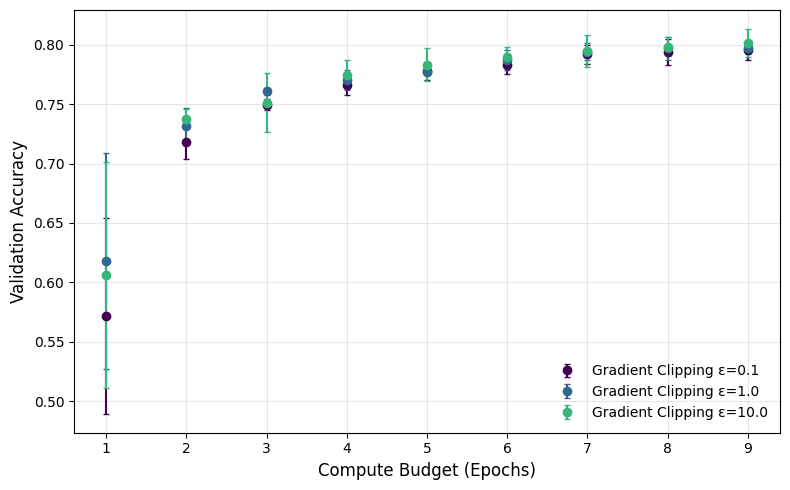

In [110]:
import matplotlib.pyplot as plt
import numpy as np
epochs_to_plot = [i for i in range(1, 10,1)]
val_acc_data = {}
pabi_camera_df['eps'] = pabi_camera_df['eps'].apply(lambda x: 0.1 if np.isclose(x, 0.1, atol=0.5) else int(round(x)))
print(pabi_camera_df['eps'].unique())
best_groups =set()
for model_name in pabi_camera_df.model_name.unique():
    fig, ax = plt.subplots(figsize=(8, 5))
    val_acc_data.clear()
    
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    eps_unique = np.sort(pabi_camera_df['eps'].unique())
    norm = mcolors.LogNorm(vmin=eps_unique[0], vmax=eps_unique[-1])
    cmap = cm.get_cmap("viridis")  # using 'viridis' as a log-based colormap
    color_map = {eps: cmap(norm(eps)) for eps in eps_unique}


    
    val_acc_data ={}
    df_model = pabi_camera_df[pabi_camera_df.model_name == model_name]
    for eps in df_model.eps.unique():
        if eps>50:
            continue
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        eps_df = df_model[df_model.eps == eps]
        
        for e in epochs_to_plot:
            filtered = eps_df.groupby([
                'config_regularization', 
                'config_grad_clip', 
                'config_eta', 
                'config_kappa'
            ]).filter(lambda x: len(x) >= 4).groupby(['config_regularization', 'config_grad_clip', 'config_eta', 'config_kappa']).agg({f'val_acc_history_{e}': 'mean'})
                
            valid_groups = filtered[filtered.index.map(lambda x: x[2] * x[0] < 1)]
            
            if not valid_groups.empty:
                best_group = valid_groups[f'val_acc_history_{e}'].idxmax()
                best_runs = eps_df[
                    (eps_df.config_regularization == best_group[0]) &
                    (eps_df.config_grad_clip == best_group[1]) &
                    (eps_df.config_eta == best_group[2]) &
                    (eps_df.config_kappa == best_group[3])
                ]
                best_groups.add(best_group)
                plotted_run_ids_eps['mnist'].extend(best_runs['run_name'].tolist())
                val_acc_data[eps][e].extend(best_runs[f'val_acc_history_{e}'].tolist())

    eps_values = sorted(val_acc_data.keys())
    
    for eps in eps_values:
        means, errs, x_pos = [], [], []
        for e in epochs_to_plot:
            acc_values = val_acc_data[eps][e]
            if acc_values:
                means.append(np.mean(acc_values))
                errs.append(1.96 * np.std(acc_values)/np.sqrt(len(acc_values)))
                x_pos.append(e)
        if len(x_pos) == 0:
            continue
        if eps != 0:
            ax.errorbar(x_pos, means, yerr=errs, fmt='o',
                       color=color_map[eps], markersize=6, capsize=2,
                       label=f'Gradient Clipping ε={eps}')

    ax.set_xlabel('Compute Budget (Epochs)', fontsize=12)
    ax.set_ylabel('Validation Accuracy', fontsize=12)
    # ax.set_title('Cifar10 - Resnet Feature Extraction Performance by Unlearning Budget PABI - 3 layer network', fontsize=14)
    ax.legend(ncol=1, fontsize=10, loc='lower right', bbox_to_anchor=(1,0), frameon=False)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(epochs_to_plot)
    plt.tight_layout()
    plt.show()

[  0.1 100.    1.   10. ]


/tmp/user/24125/ipykernel_2956671/4293186577.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")  # using 'viridis' as a log-based colormap


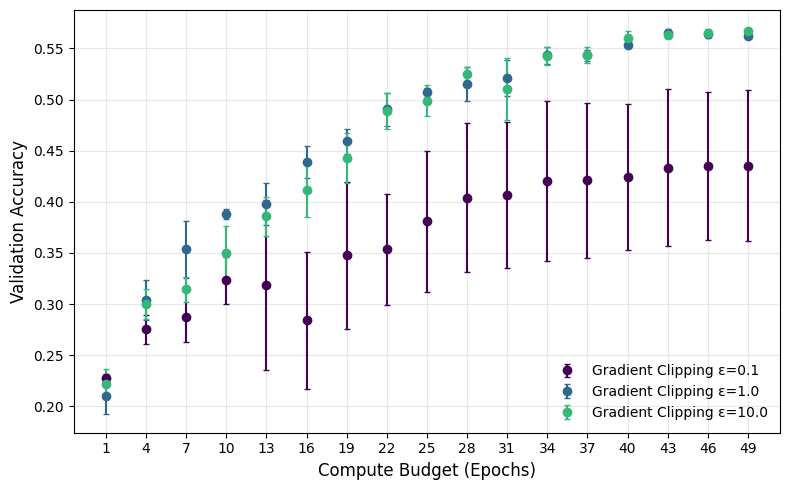

In [111]:
import matplotlib.pyplot as plt
import numpy as np
epochs_to_plot = [i for i in range(1, 51,3)]
val_acc_data = {}
pabi_camera_df_cifar['eps'] = pabi_camera_df_cifar['eps'].apply(lambda x: 0.1 if np.isclose(x, 0.1, atol=0.5) else int(round(x)))
print(pabi_camera_df_cifar['eps'].unique())
best_groups =set()
for model_name in pabi_camera_df_cifar.model_name.unique():
    fig, ax = plt.subplots(figsize=(8, 5))
    val_acc_data.clear()
    
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    eps_unique = np.sort(pabi_camera_df_cifar['eps'].unique())
    norm = mcolors.LogNorm(vmin=eps_unique[0], vmax=eps_unique[-1])
    cmap = cm.get_cmap("viridis")  # using 'viridis' as a log-based colormap
    color_map = {eps: cmap(norm(eps)) for eps in eps_unique}


    
    val_acc_data ={}
    df_model = pabi_camera_df_cifar[pabi_camera_df_cifar.model_name == model_name]
    for eps in df_model.eps.unique():
        if eps>50:
            continue
        val_acc_data[eps] = {e: [] for e in epochs_to_plot}
        eps_df = df_model[df_model.eps == eps]
        
        for e in epochs_to_plot:
            filtered = eps_df.groupby([
                'config_regularization', 
                'config_grad_clip', 
                'config_eta', 
                'config_kappa'
            ]).filter(lambda x: len(x) >= 4).groupby(['config_regularization', 'config_grad_clip', 'config_eta', 'config_kappa']).agg({f'val_acc_history_{e}': 'mean'})
                
            valid_groups = filtered[filtered.index.map(lambda x: x[2] * x[0] < 1)]
            
            if not valid_groups.empty:
                best_group = valid_groups[f'val_acc_history_{e}'].idxmax()
                best_runs = eps_df[
                    (eps_df.config_regularization == best_group[0]) &
                    (eps_df.config_grad_clip == best_group[1]) &
                    (eps_df.config_eta == best_group[2]) &
                    (eps_df.config_kappa == best_group[3])
                ]
                best_groups.add(best_group)
                plotted_run_ids_eps['cifar'].extend(best_runs['run_name'].tolist())
                val_acc_data[eps][e].extend(best_runs[f'val_acc_history_{e}'].tolist())

    eps_values = sorted(val_acc_data.keys())
    
    for eps in eps_values:
        means, errs, x_pos = [], [], []
        for e in epochs_to_plot:
            acc_values = val_acc_data[eps][e]
            if acc_values:
                means.append(np.mean(acc_values))
                errs.append(1.96 * np.std(acc_values)/np.sqrt(len(acc_values)))
                x_pos.append(e)
        if len(x_pos) == 0:
            continue
        if eps != 0:
            ax.errorbar(x_pos, means, yerr=errs, fmt='o',
                       color=color_map[eps], markersize=6, capsize=2,
                       label=f'Gradient Clipping ε={eps}')

    ax.set_xlabel('Compute Budget (Epochs)', fontsize=12)
    ax.set_ylabel('Validation Accuracy', fontsize=12)
    # ax.set_title('Cifar10 - Resnet Feature Extraction Performance by Unlearning Budget PABI - 3 layer network', fontsize=14)
    ax.legend(ncol=1, fontsize=10, loc='lower right', bbox_to_anchor=(1,0), frameon=False)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(epochs_to_plot)
    plt.tight_layout()
    plt.show()

In [112]:
for x,y in plotted_run_ids_eps.items():
    plotted_run_ids_eps[x]=list(set(y))
for x,y in plotted_run_ids_eps.items():
    print(f'{x}: {len(y)=}')

mnist: len(y)=24
cifar: len(y)=20


In [113]:
import os
import shutil

base_log_dir = "/lfs/mercury1/0/animjha/unlearning/logs"
target_base = "/lfs/mercury1/0/animjha/unlearning/eps_sweep_runs"

for key, run_ids in plotted_run_ids_eps.items():
    target_folder = os.path.join(target_base, key)
    os.makedirs(target_folder, exist_ok=True)
    
    for r in run_ids:
        src = os.path.join(base_log_dir, r, "config.yaml")
        dst = os.path.join(target_folder, f"{r}_config.yaml")
        try:
            shutil.copy(src, dst)
        except Exception as e:
            print(f"Error copying from {src} to {dst}: {e}")